In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows=100

In [4]:
# Importing data

data = pd.read_csv("train.csv")

## Basic Understanding of data

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking for nulls

In [8]:
#Checking % of null values in each column and removing columns with all non-null values
col_null = round(data.isnull().sum()/len(data.index)*100,2).sort_values()
col_null = col_null[col_null>0]
print(col_null)

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtFinType2     2.60
BsmtExposure     2.60
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
GarageCond       5.55
LotFrontage     17.74
FireplaceQu     47.26
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64


### Summary:
- There are **1460 rows** and **81 columns**
- There are **19 columns** with at least one null value and **6 columns** with more than 15% null values

## Data Cleaning

In [9]:
# Removing columns with more than 15% null values as imputing can cause the data to become biased
data.drop(["FireplaceQu","Fence","Alley","MiscFeature","PoolQC", "LotFrontage"],axis=1,inplace=True)

In [10]:
#Removing the id columns as it does not add any value to the analysis
data.drop(['Id'],axis=1,inplace=True)

In [11]:
#Dropping rows with null data
data.dropna(axis='rows', inplace=True)

In [12]:
data.shape

(1338, 74)

In [13]:
#Checking for nulls again to confirm
print("No of Columns that contain Null values:",len(round(data.isnull().sum()/len(data.index)*100,2)[round(data.isnull().sum()/len(data.index)*100,2).sort_values() > 0]))

No of Columns that contain Null values: 0


In [14]:
#Identifying the categorical and numnerical columns using data-dictionary
# This is being done so that the datatypes can be made as per true nature of data
target_col = ["SalePrice"]
categorical_cols = ["MSSubClass", "MSZoning", "Street","LotShape","LandContour","Utilities","SaleCondition",
                    "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle",
                    "OverallQual","OverallCond","RoofStyle","RoofMatl","Exterior1st","Exterior2nd", "MasVnrType",
                    "ExterQual","ExterCond", "Foundation", "BsmtQual","BsmtCond", "BsmtExposure", "BsmtFinType1",
                    "BsmtFinType2","Heating", "HeatingQC","CentralAir", "Electrical", "KitchenQual", "PavedDrive",
                    "Functional", "GarageType","GarageFinish","GarageQual","GarageCond",'MoSold', 'YrSold',"SaleType"]
numeric_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
misc_cols = ["YearBuilt","YearRemodAdd","GarageYrBlt"]

print("Total Columns:",len(target_col)+len(categorical_cols)+len(numeric_cols)+len(misc_cols))

# 'DiffYearBuilt', 'DiffYearRemodAdd','DiffGarageYrBlt'

Total Columns: 74


In [15]:
#Checking if any column holds a single value.
#Such a column does not contribute to the variance in the target variable

#Simple method that checksif there are more than one values for a col
non_unique_check = data.to_numpy()
print(~((non_unique_check[0] == non_unique_check).all(0)))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


### Summary:
- There are **1338 datapoints** after cleanup and **73 features** to evaluate
- All columns have more than 1 value

## Derived Columns

In [16]:
#converting misc_cols to better interpreted features and dropping them
data['BuiltAge'] = pd.datetime.now().year - data['YearBuilt']
data['RemodAge'] = pd.datetime.now().year - data['YearRemodAdd']
data['GarageAge'] = pd.datetime.now().year - data['GarageYrBlt']
data.drop(misc_cols,axis=1,inplace=True)

In [17]:
data[['BuiltAge','RemodAge', 'GarageAge']].describe()

,BuiltAge,RemodAge,GarageAge
count,1338.000000,1338.000000,1338.000000
mean,48.970852,36.331091,43.403587
std,29.563540,20.296463,24.773741
min,12.000000,12.000000,12.000000
25%,21.000000,18.000000,20.000000
50%,46.000000,27.500000,42.000000
75%,66.000000,54.000000,60.000000
max,142.000000,72.000000,122.000000


In [18]:
data.shape

(1338, 74)

### Summary:
- 3 new features derived:
    - BuiltAge
    - RemodAge
    - GarageAge

## Exploratory Data Analysis

#### Check for linear relationships between target and independent variable

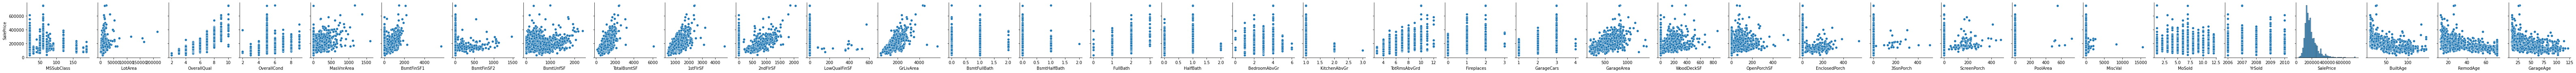

In [19]:
# A Simple pairplot of all variables wrt SalesPrice to check for linear relationships
sns.pairplot(data, y_vars=target_col)
plt.show()

##### **Conclusion:**
- From the above pairplot grid (double click on the charts to zoom), it is clear that some features have a very clear linear relationship with the target feature

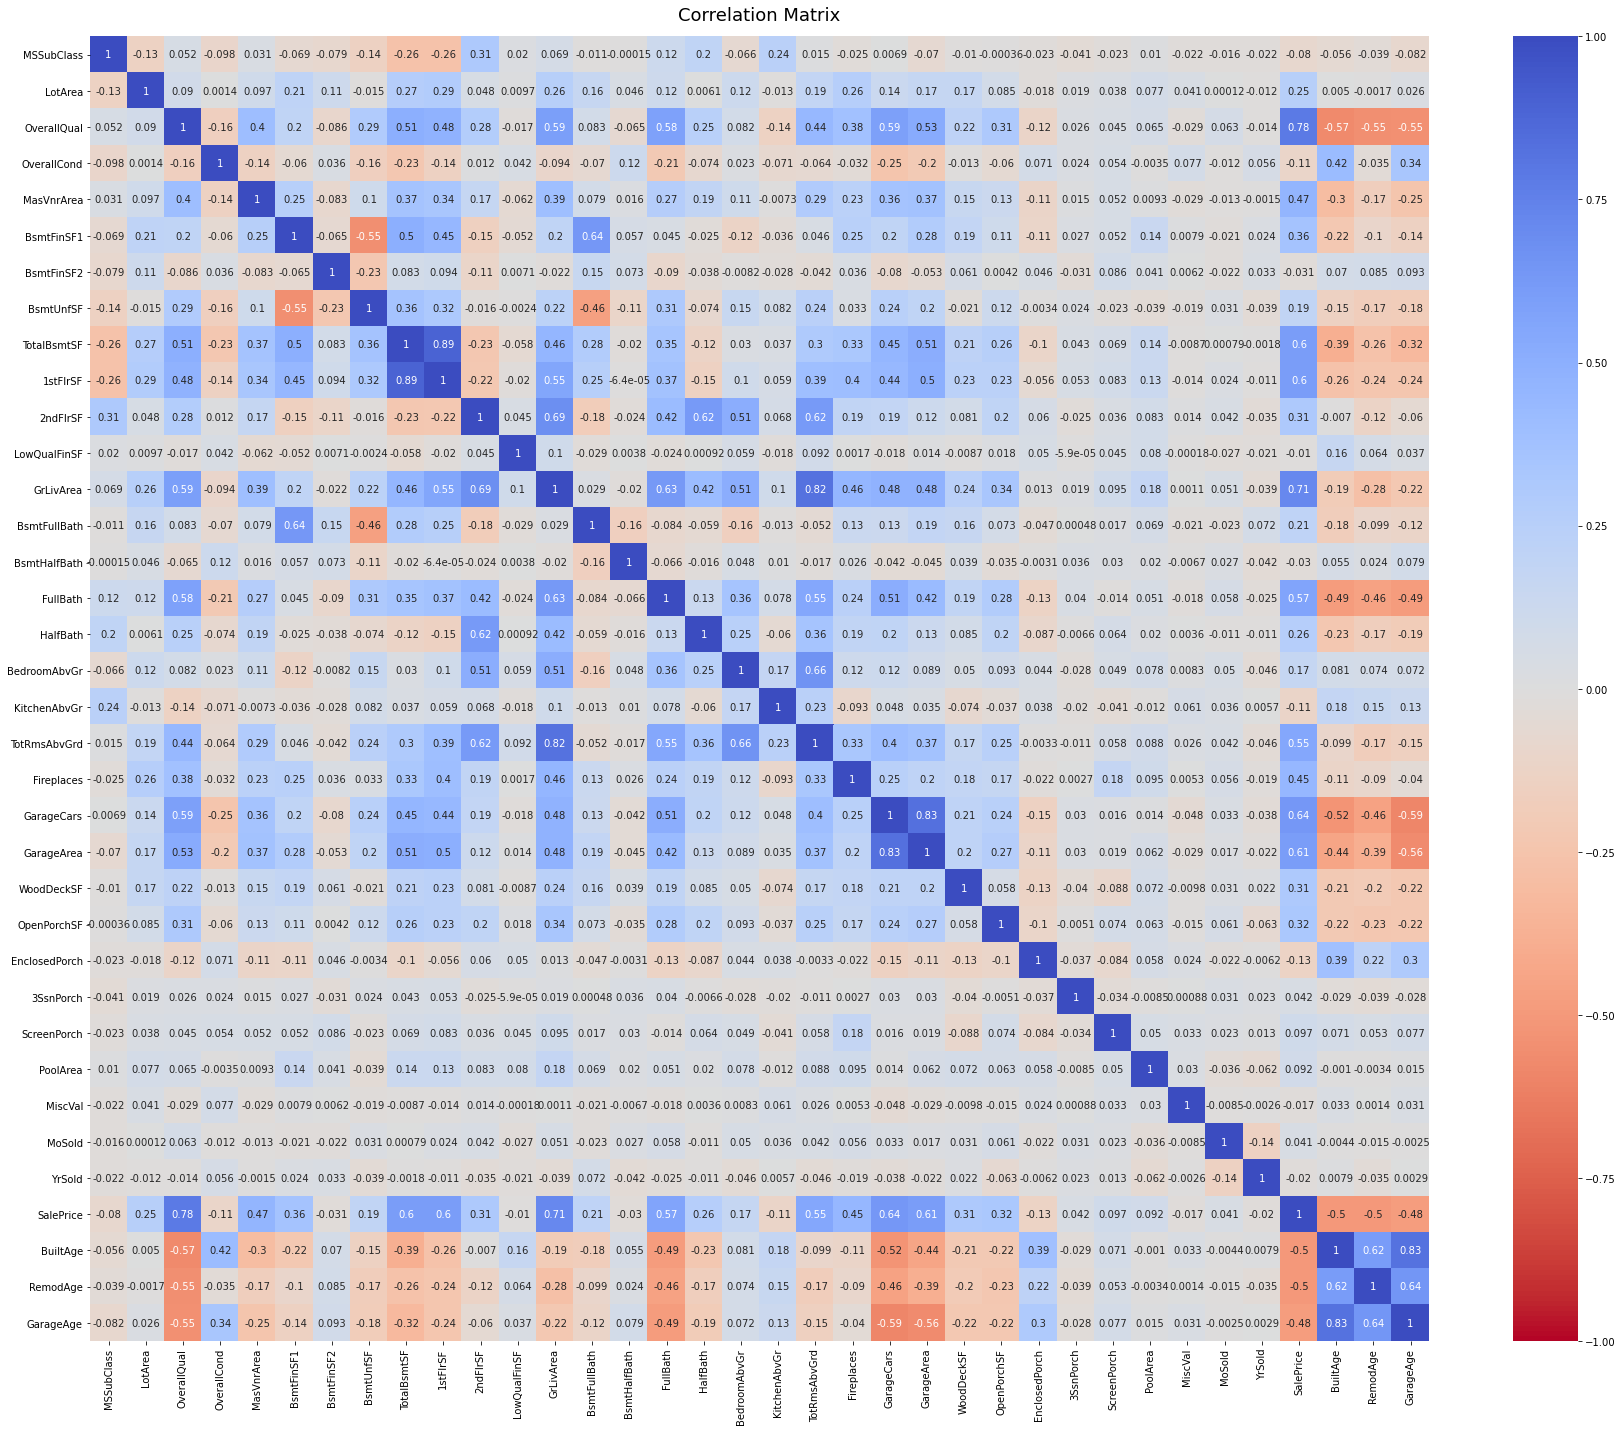

In [20]:
#Correlation Matrix
plt.figure(figsize=(30,24))
corr_plot = sns.heatmap(data.corr(), cmap='coolwarm_r', vmin=-1, vmax=1, annot=True)
corr_plot.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=16);
plt.show(corr_plot)

##### **Conclusion:**
There is a clear correlation (0.60 and more) between the SalePrice and the following features:
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF

#### Visual Analysis of Categorical Variables

In [21]:
def draw_boxplot(x_var, y_var='SalePrice', df=data):
    return sns.boxplot(x=x_var,y=y_var, data=df)

def draw_barplot(x_var, y_var='SalePrice', df=data):
    return sns.barplot(x=x_var, y=y_var, data=df)

MSSubClass


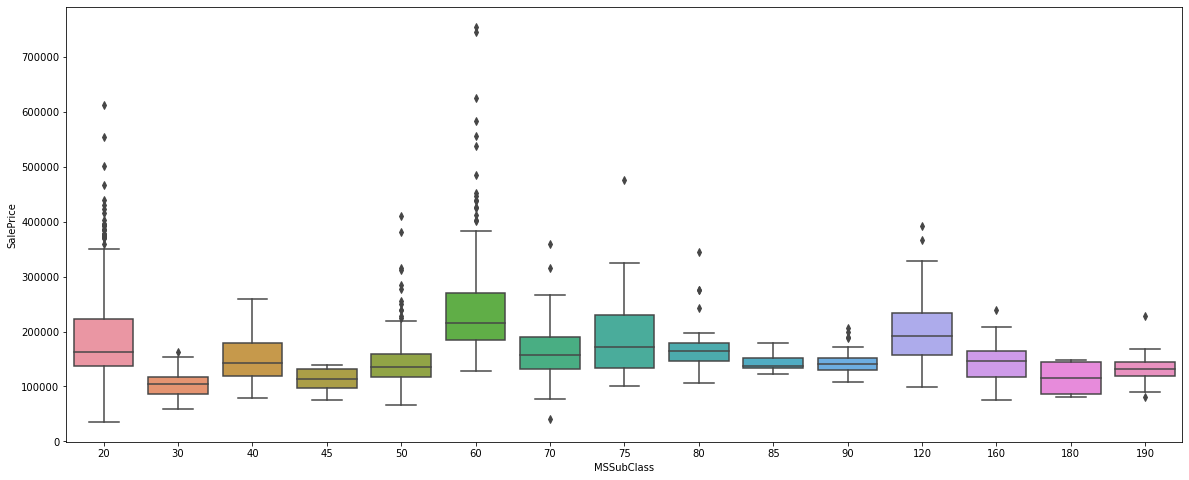

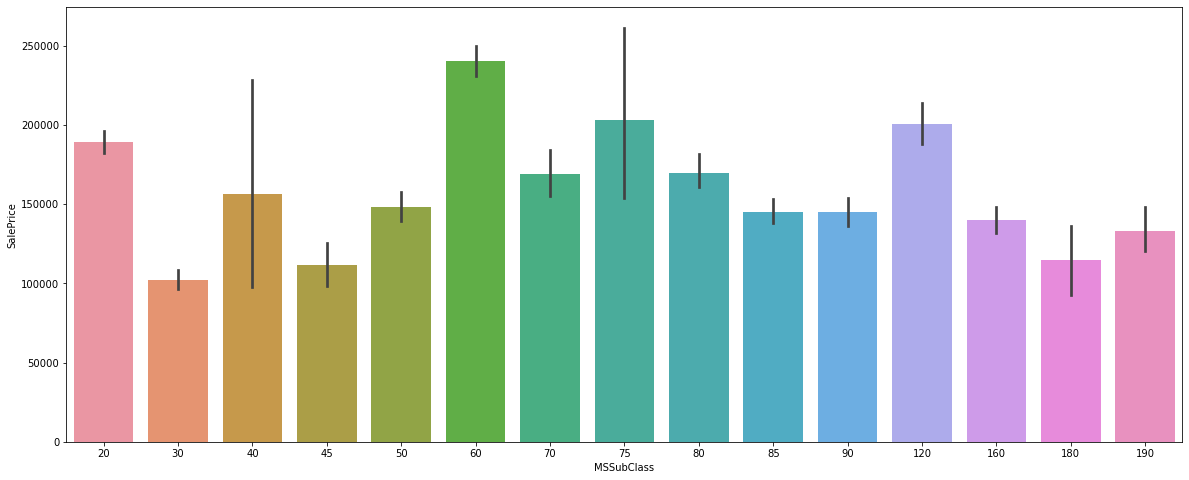

MSZoning


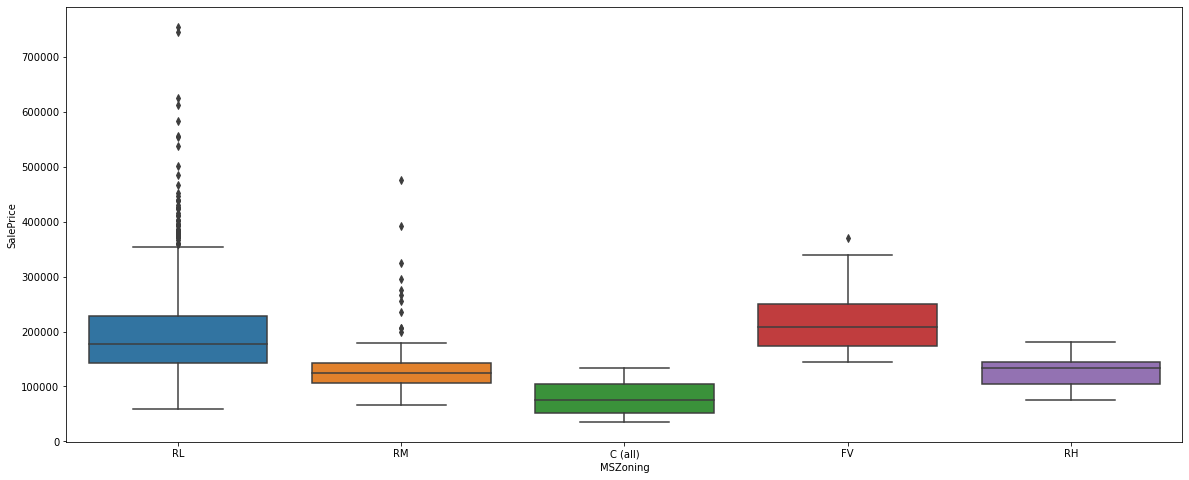

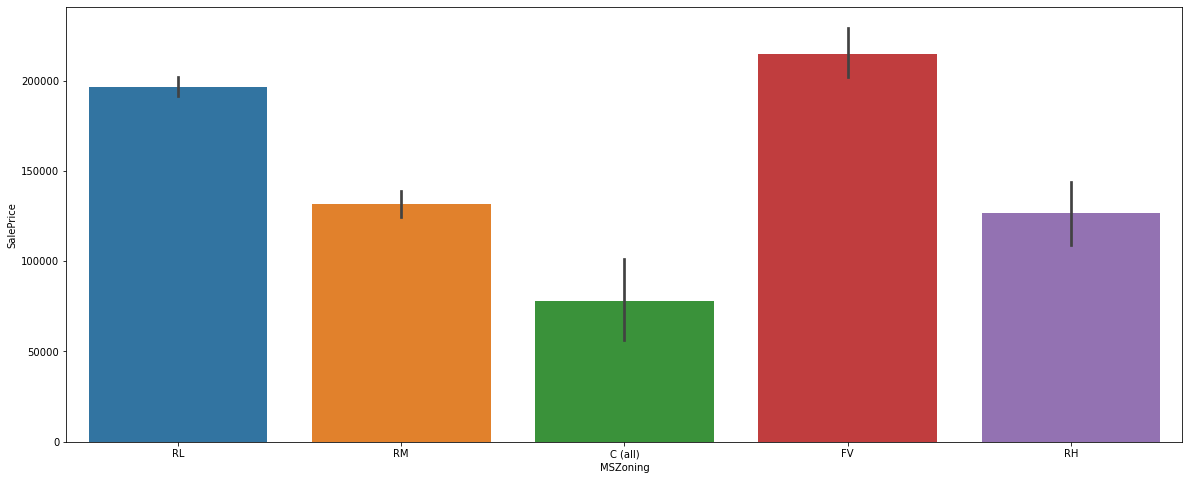

Street


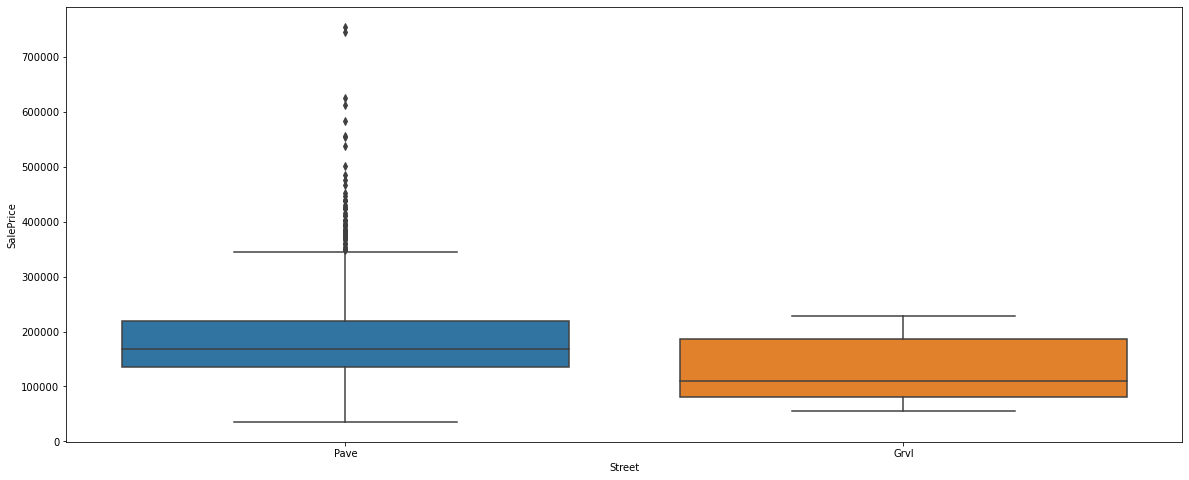

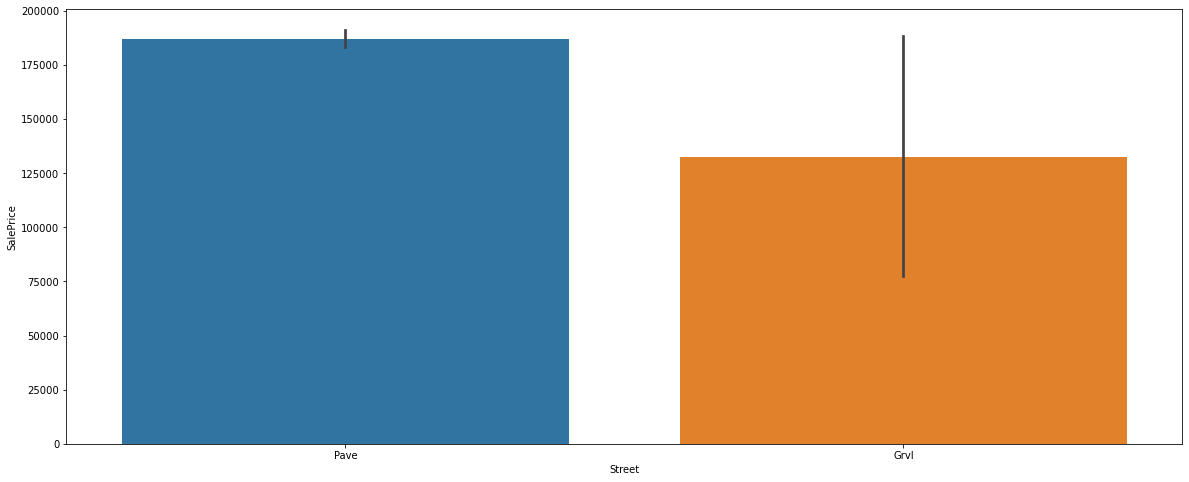

LotShape


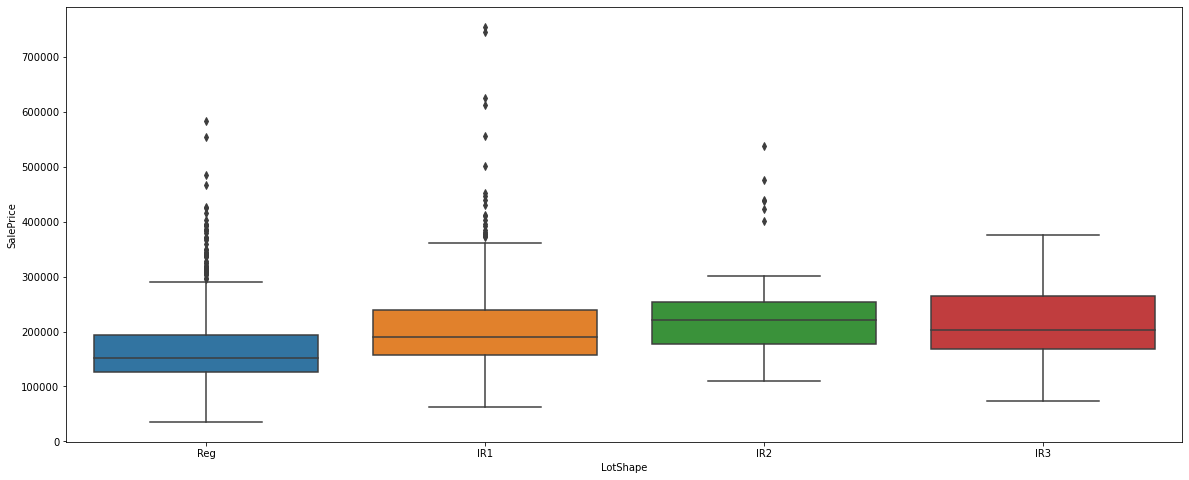

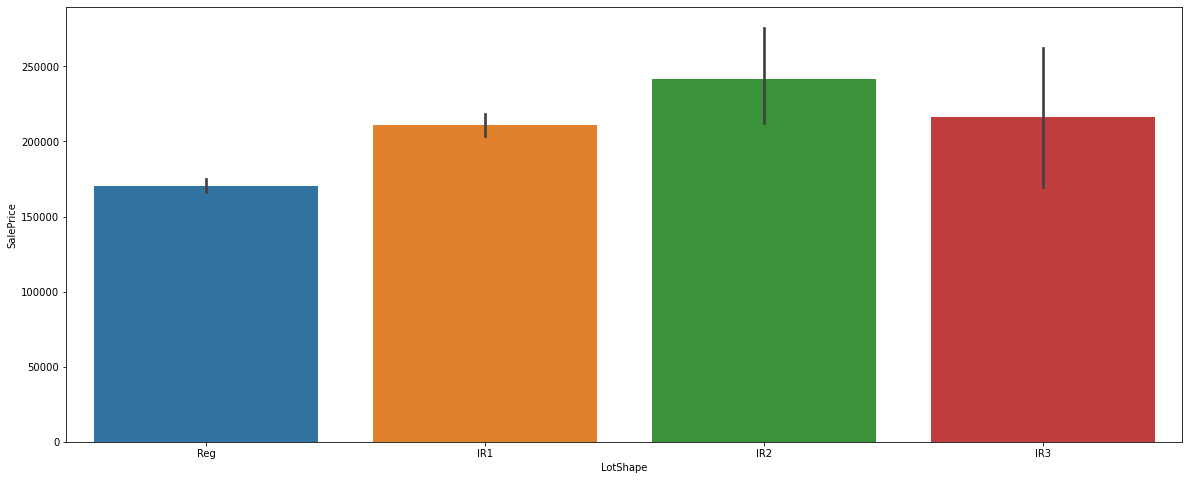

LandContour


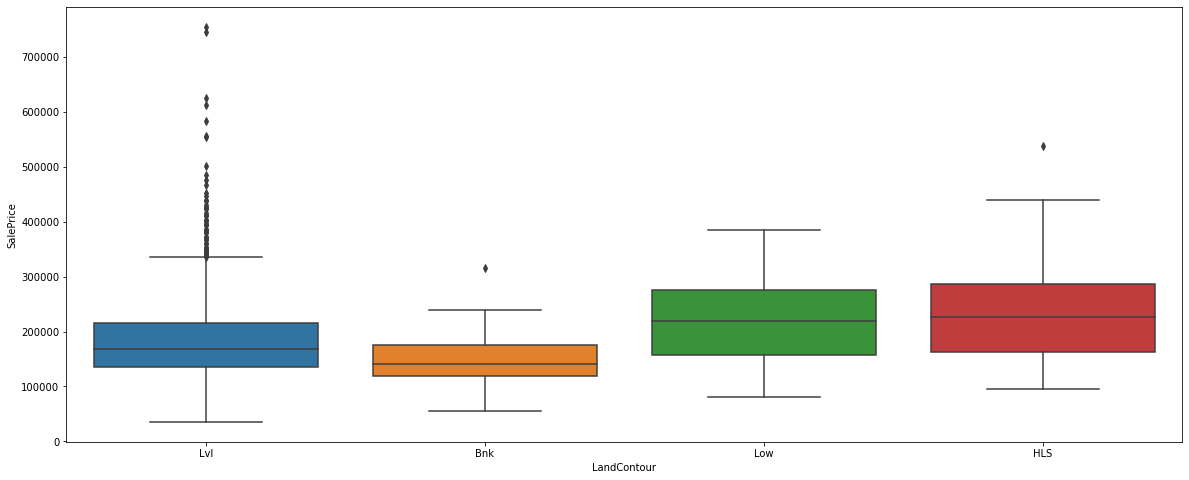

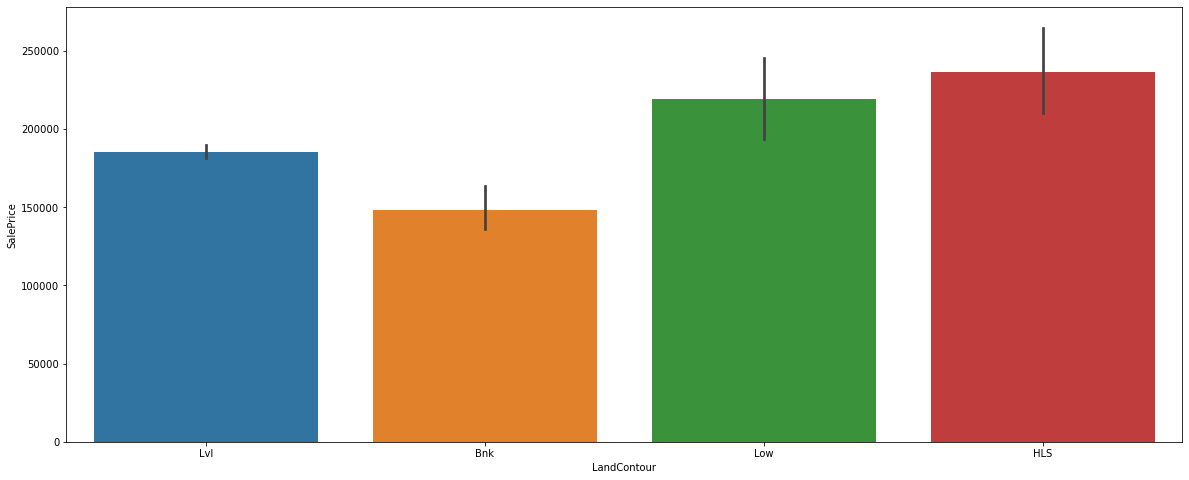

Utilities


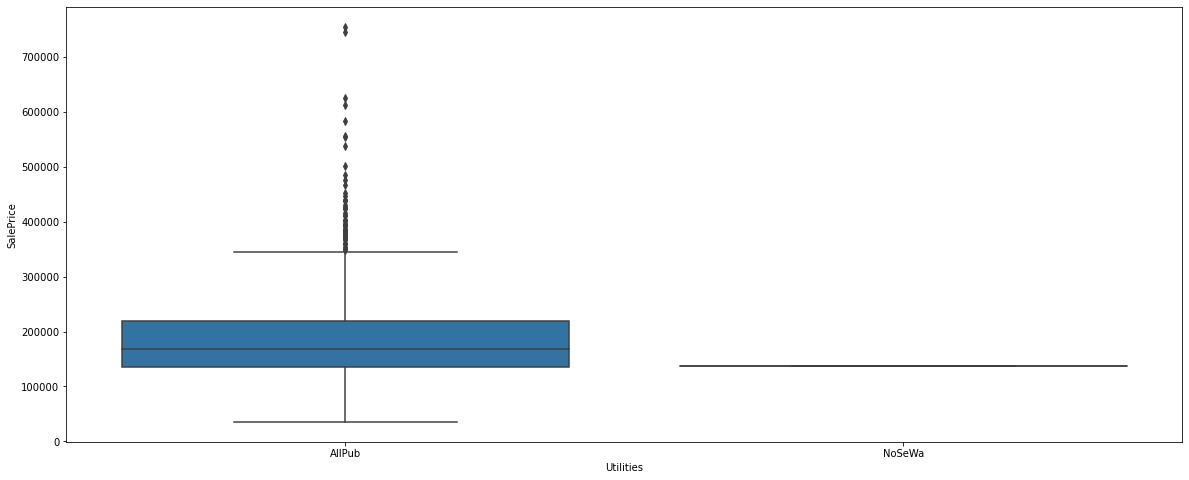

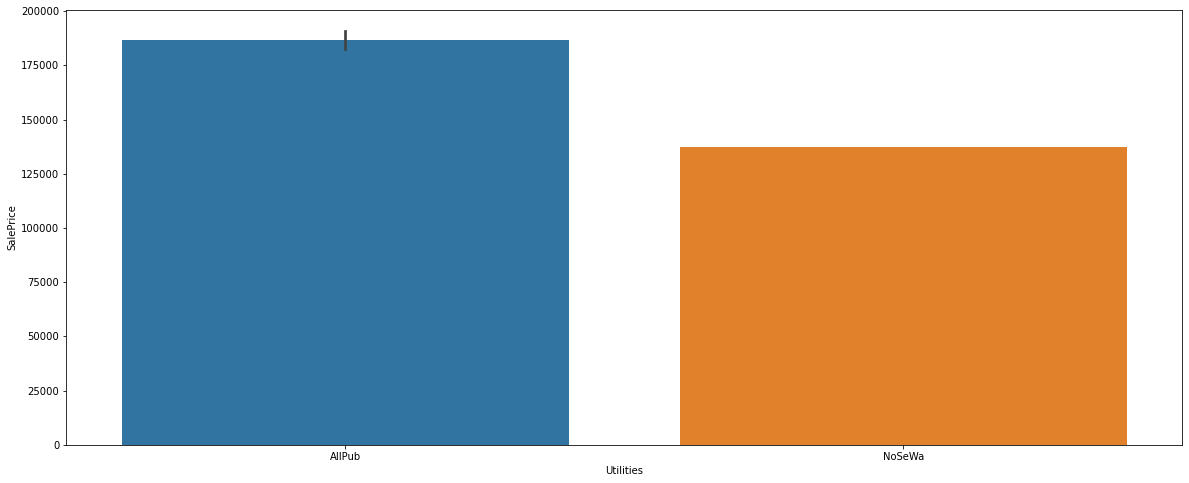

SaleCondition


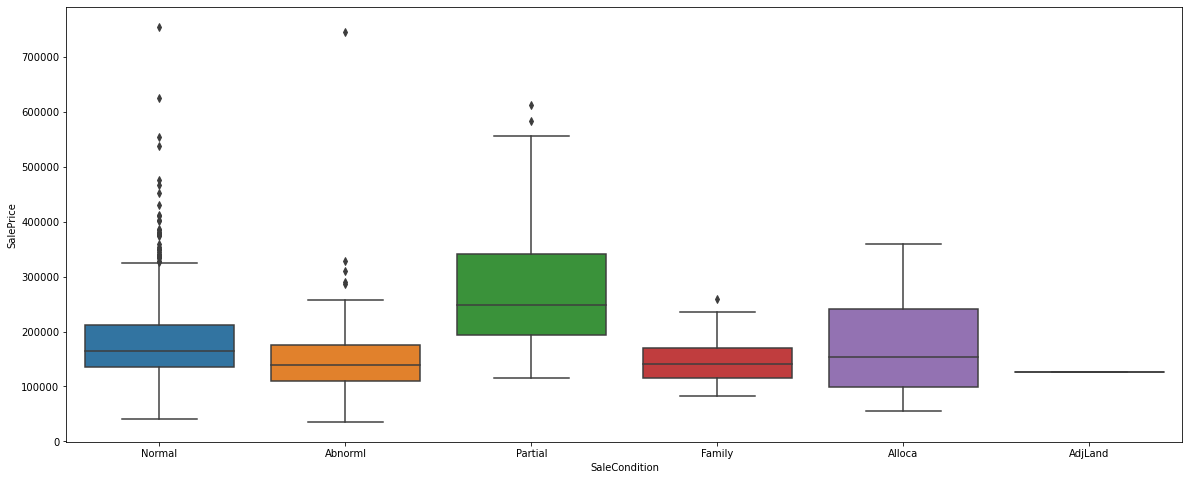

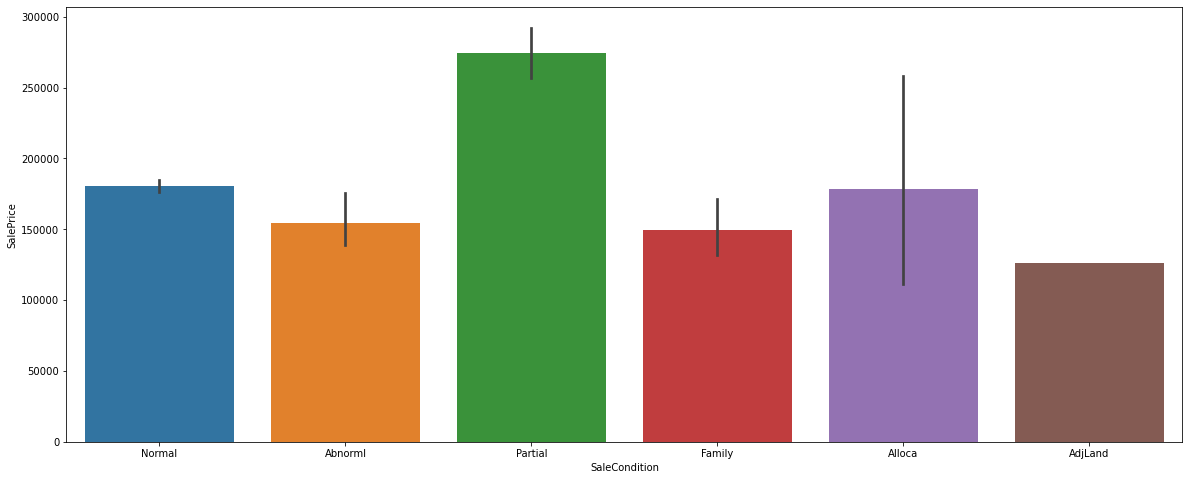

LotConfig


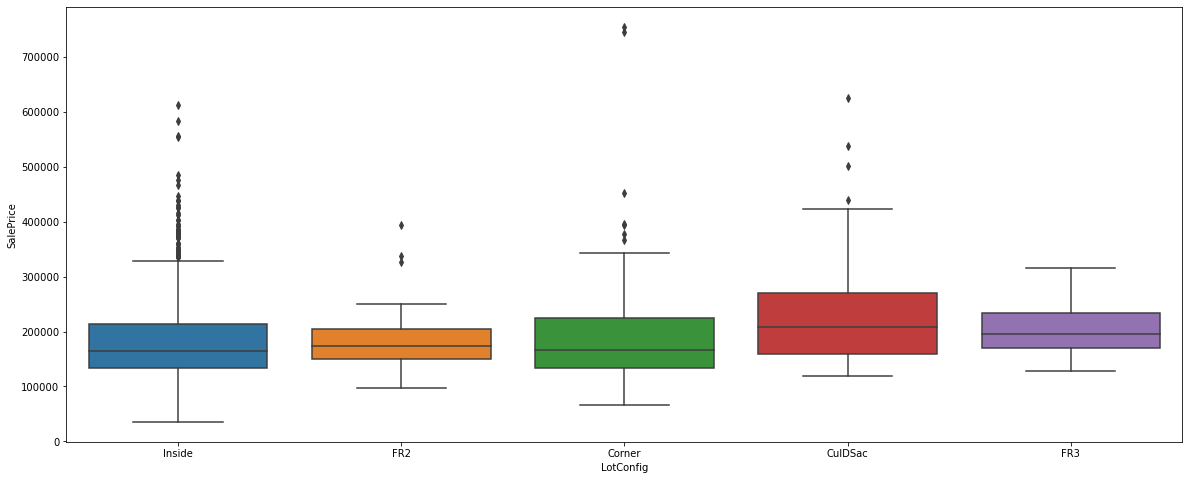

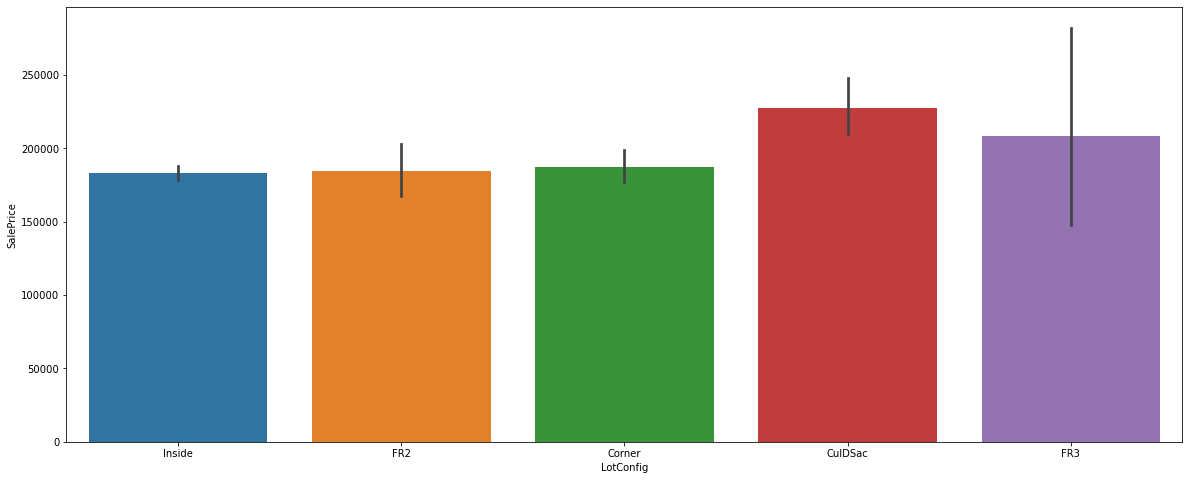

LandSlope


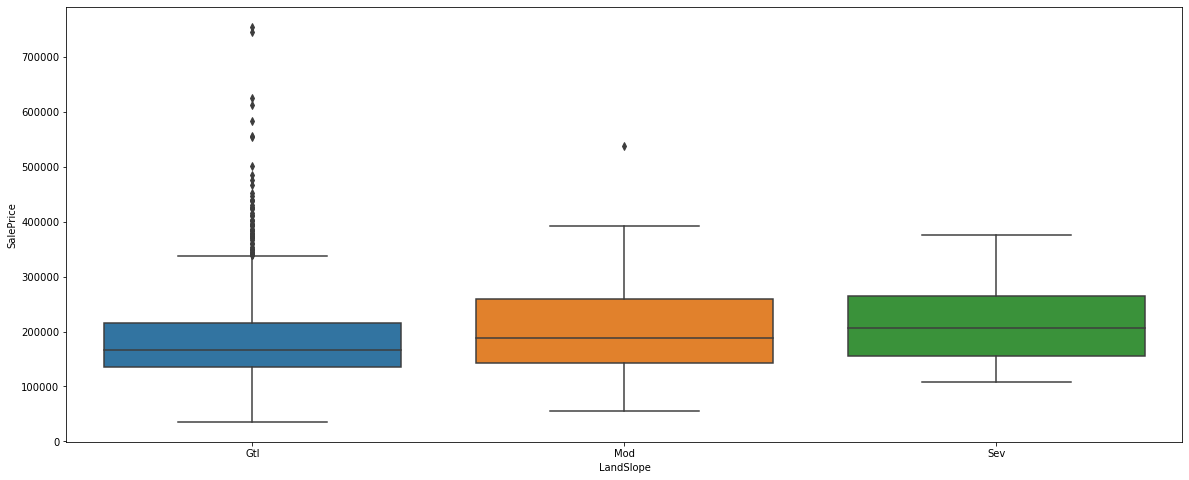

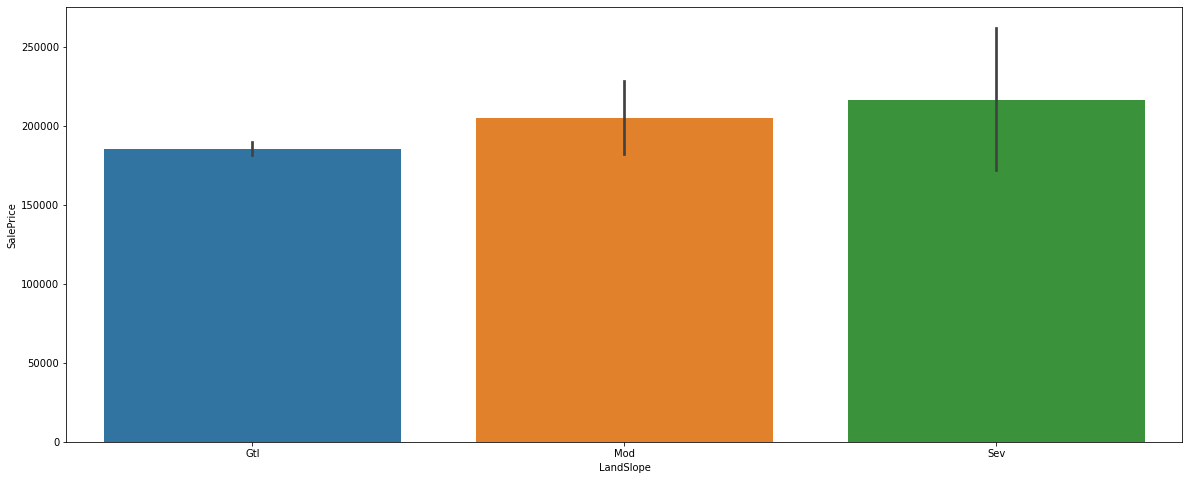

Neighborhood


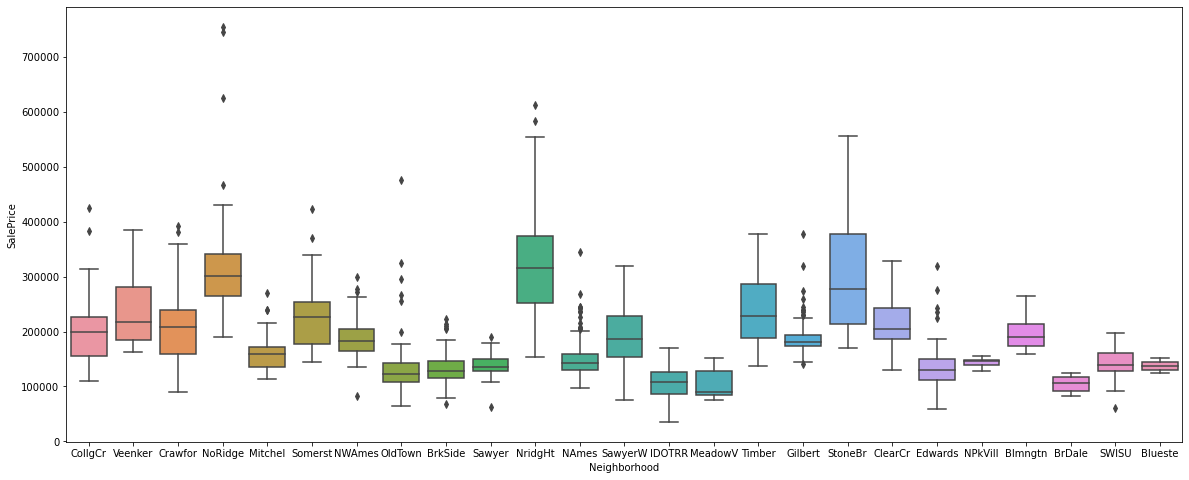

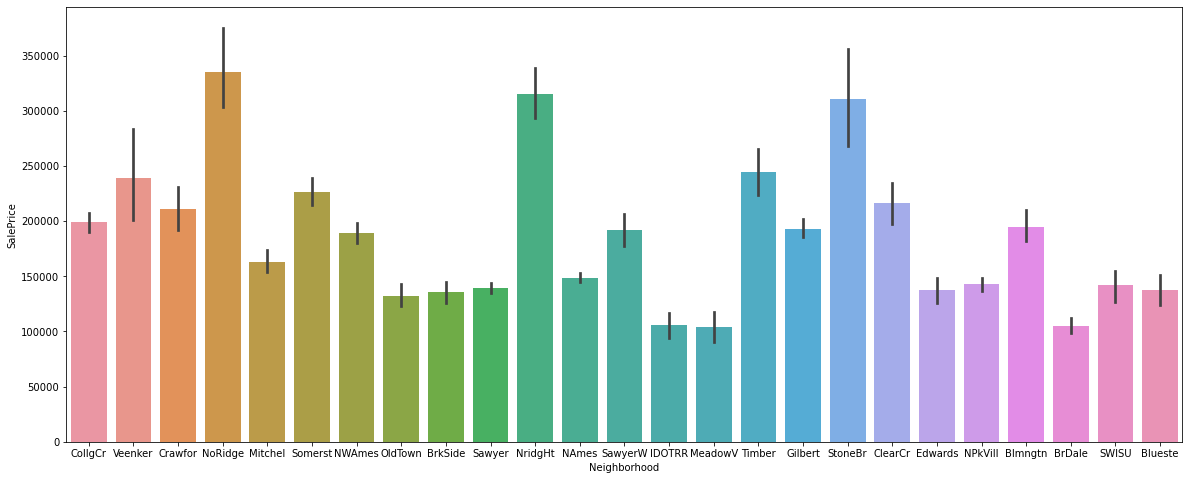

Condition1


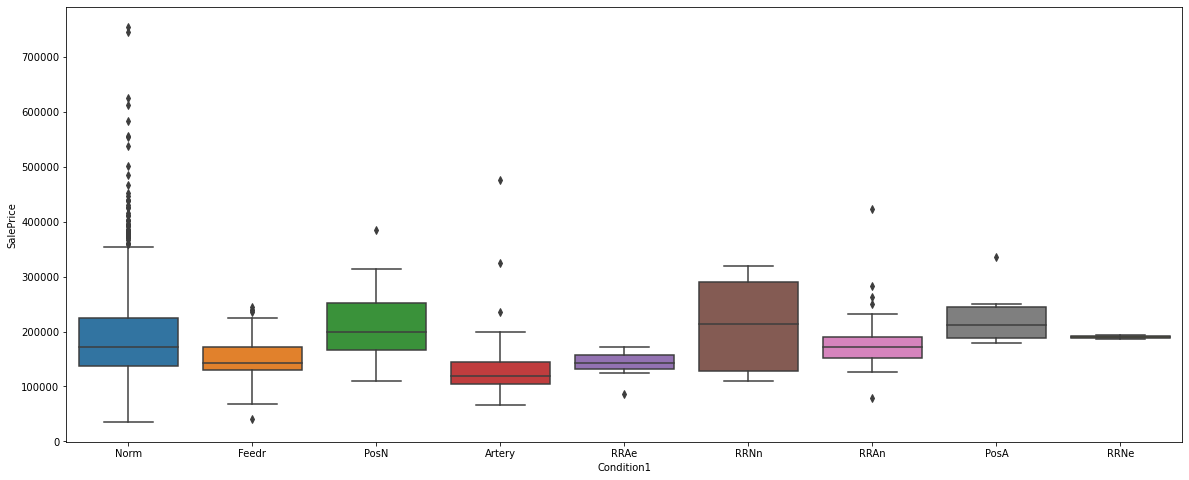

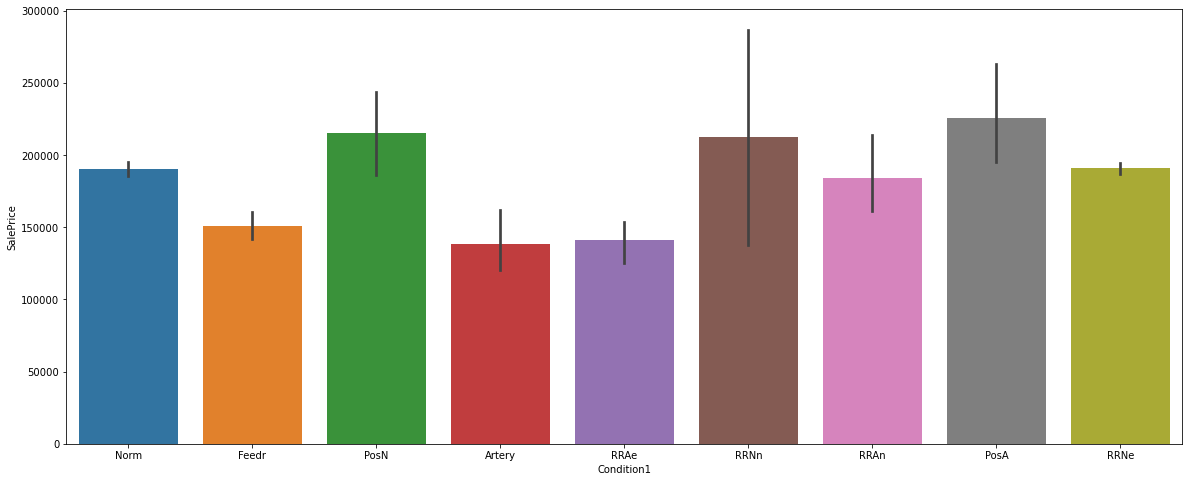

Condition2


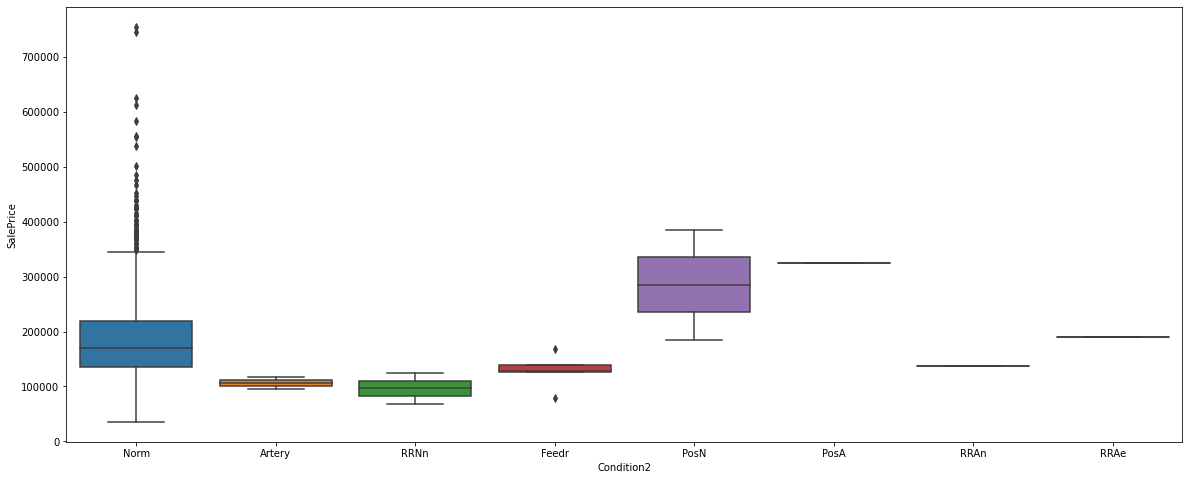

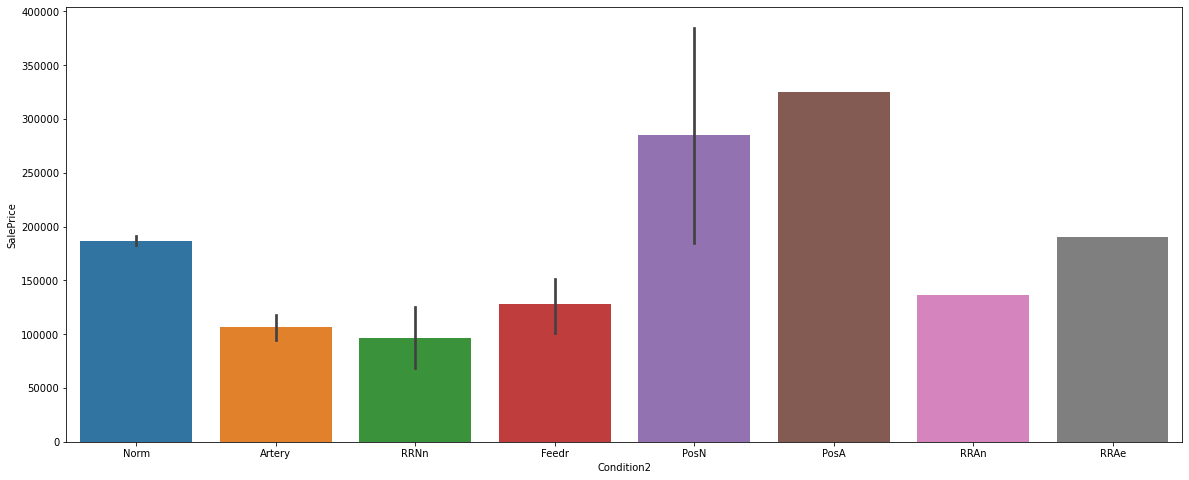

BldgType


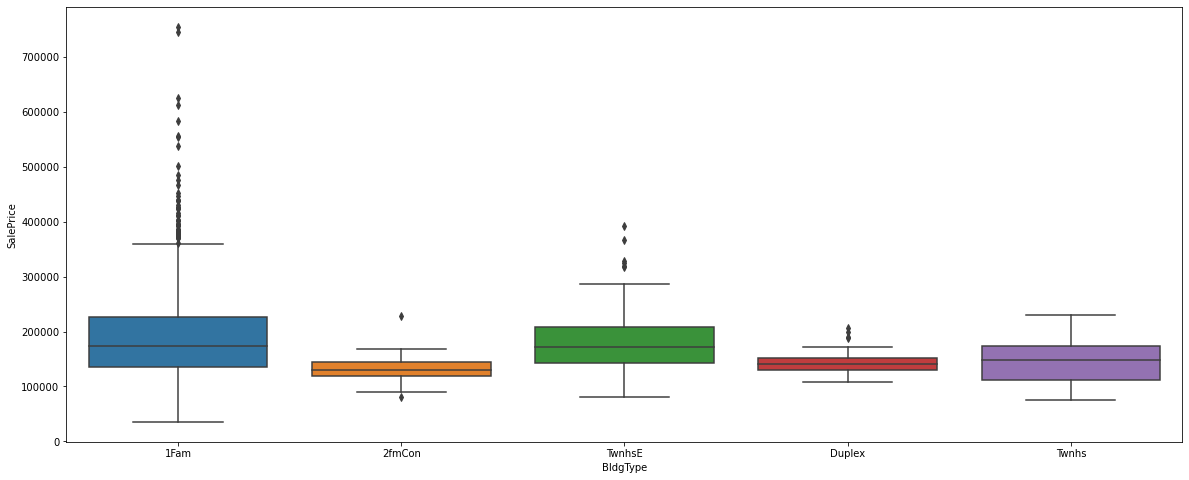

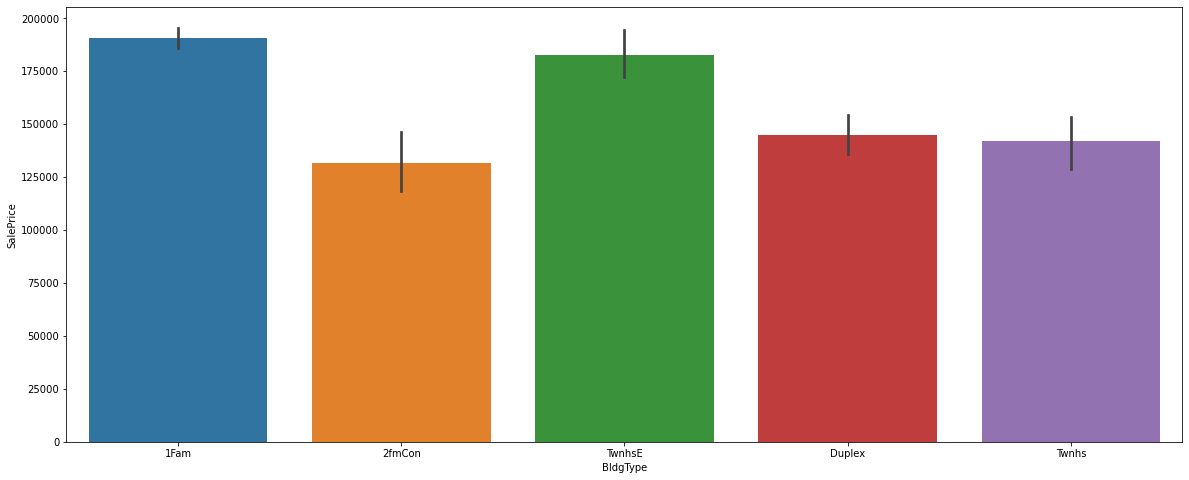

HouseStyle


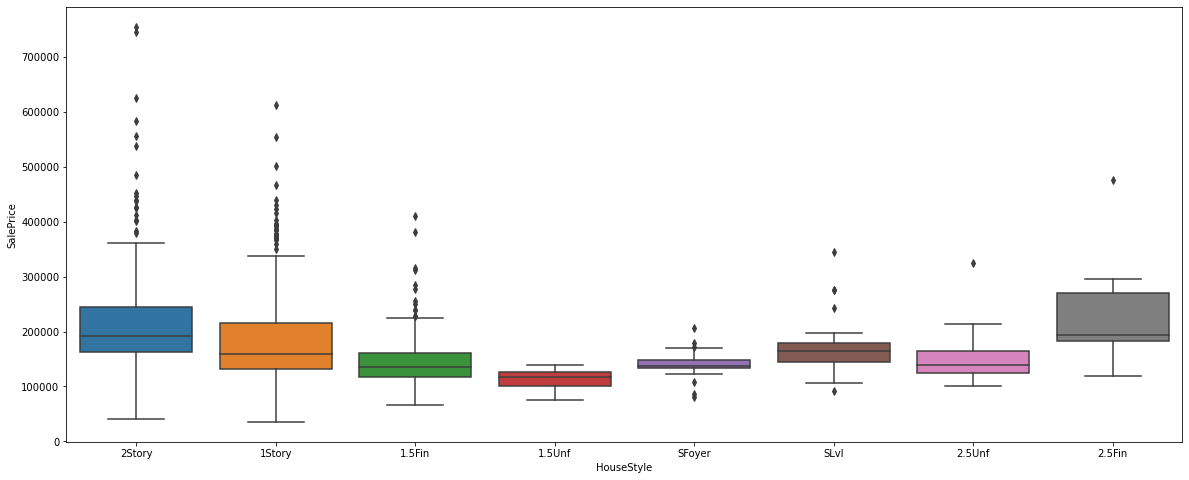

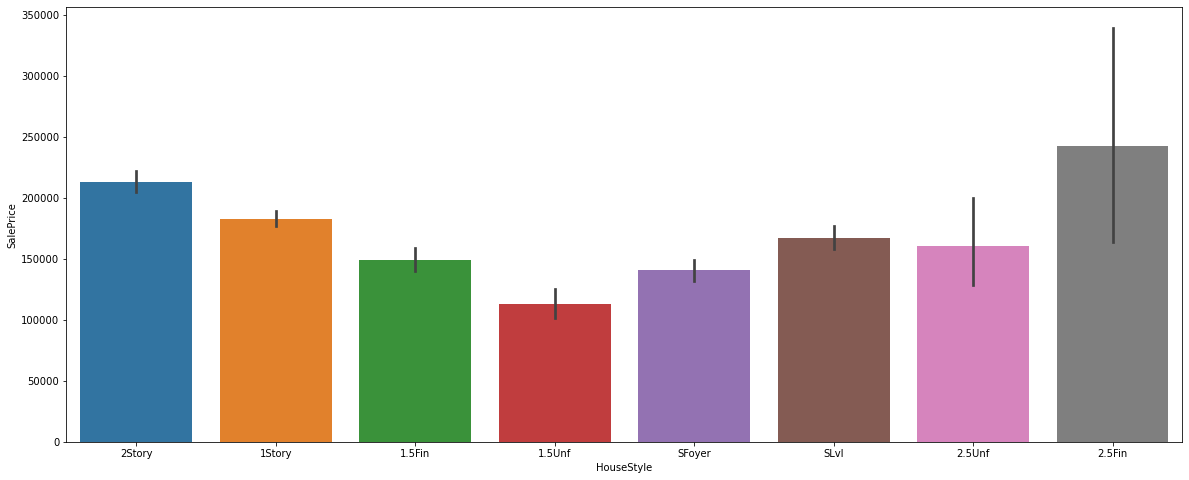

OverallQual


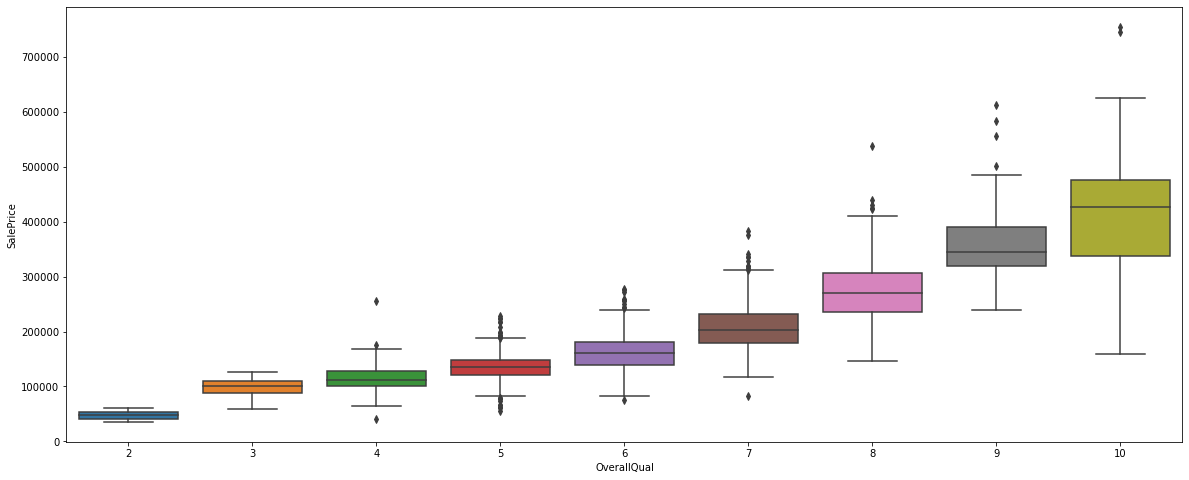

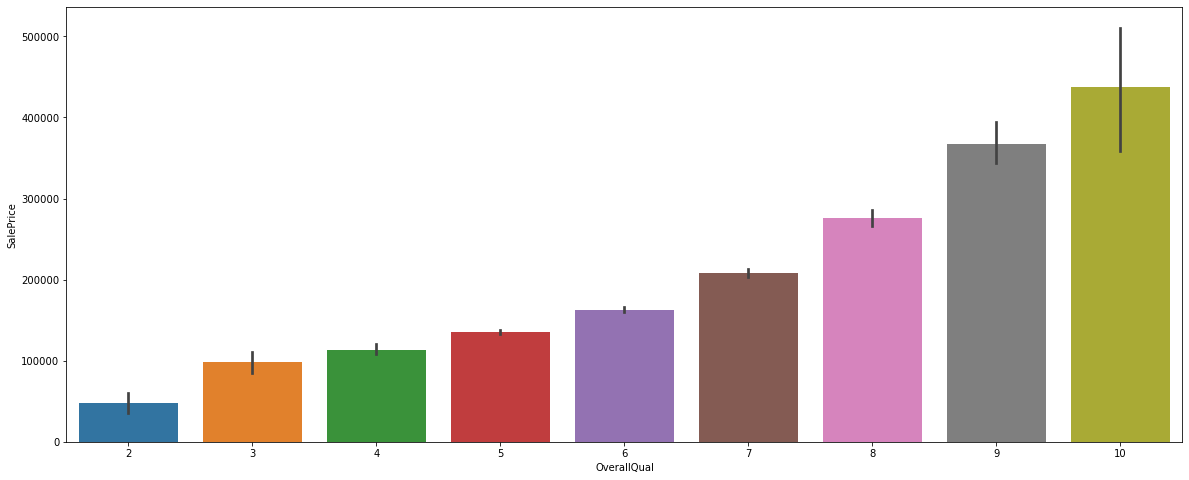

OverallCond


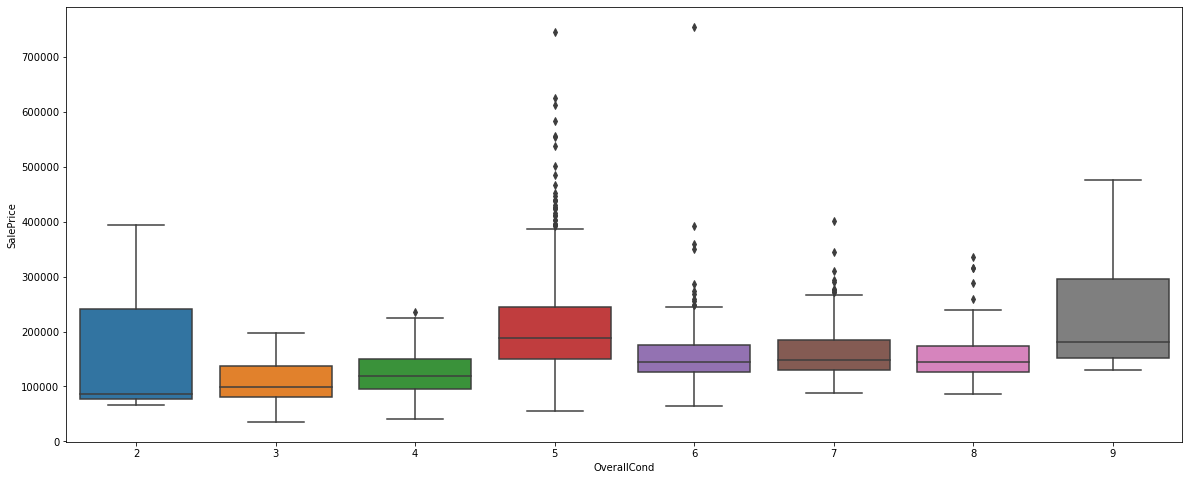

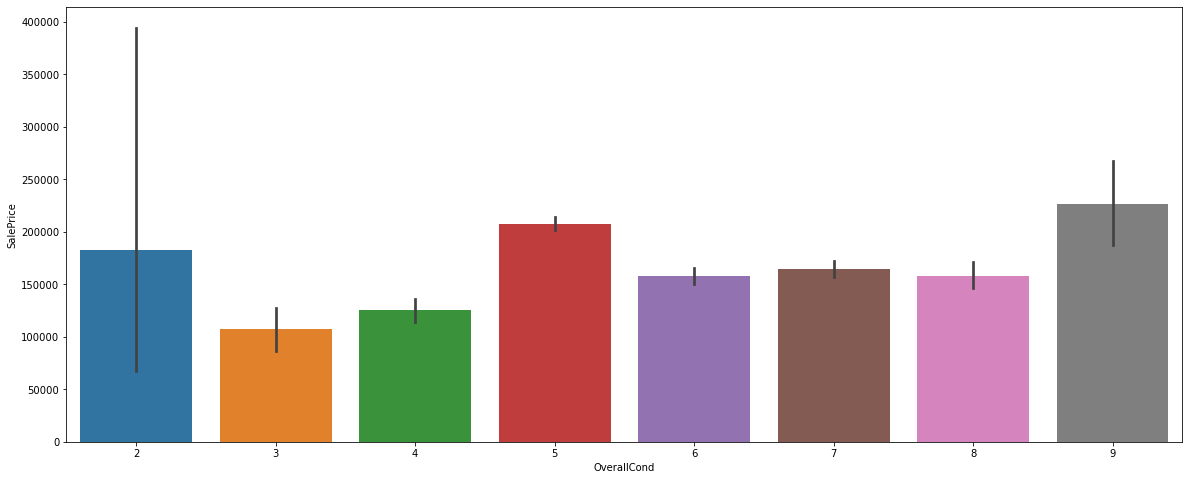

RoofStyle


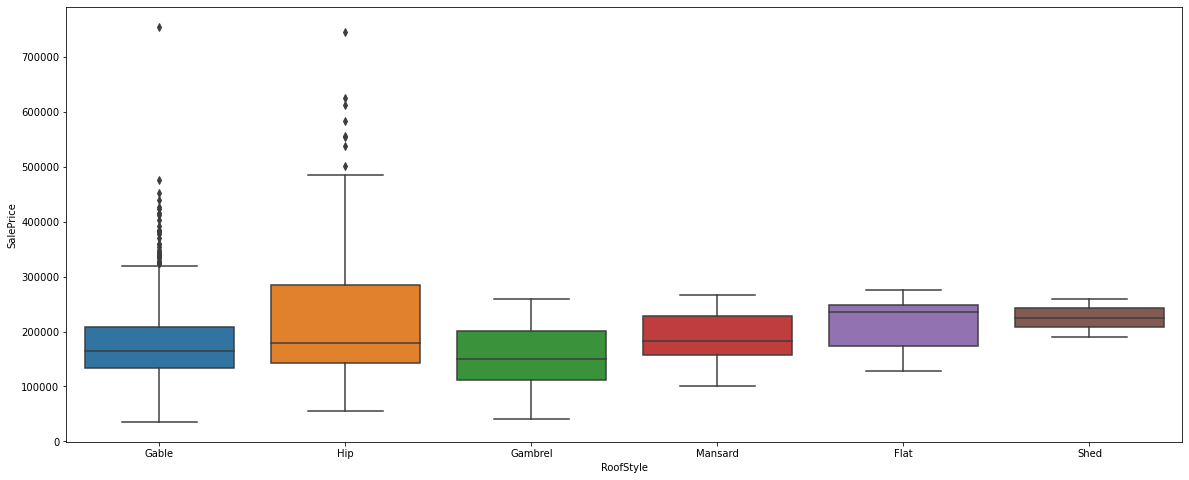

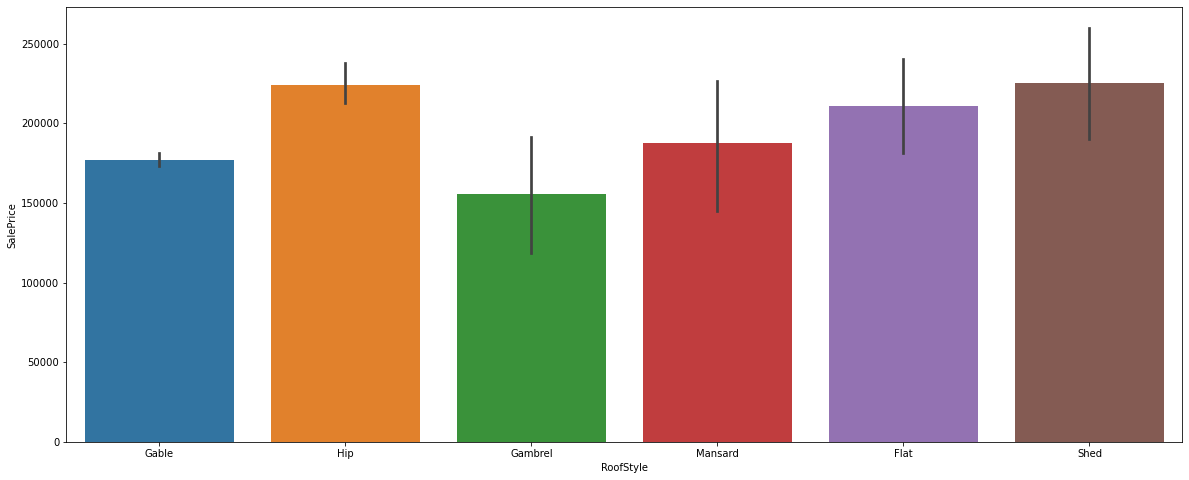

RoofMatl


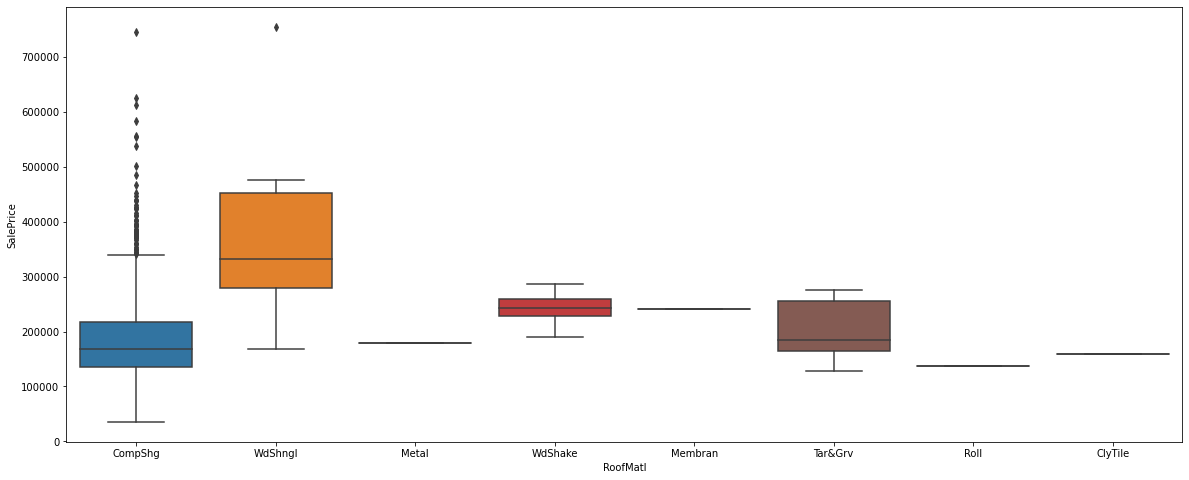

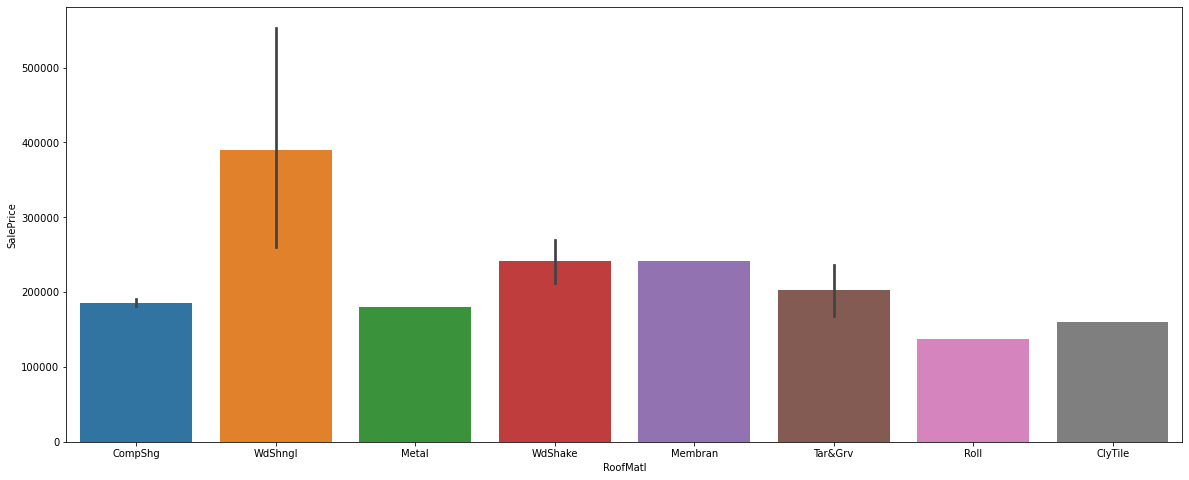

Exterior1st


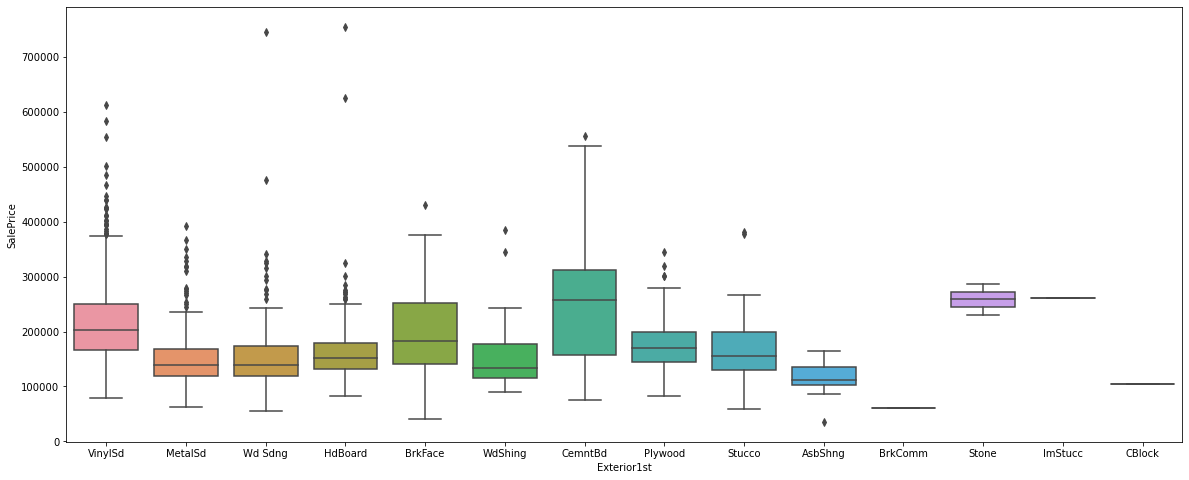

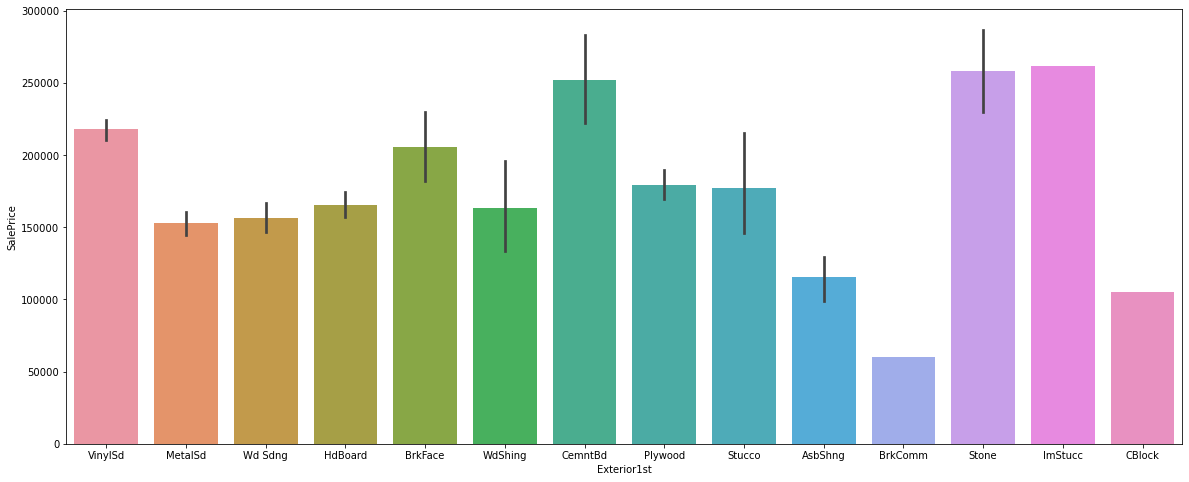

Exterior2nd


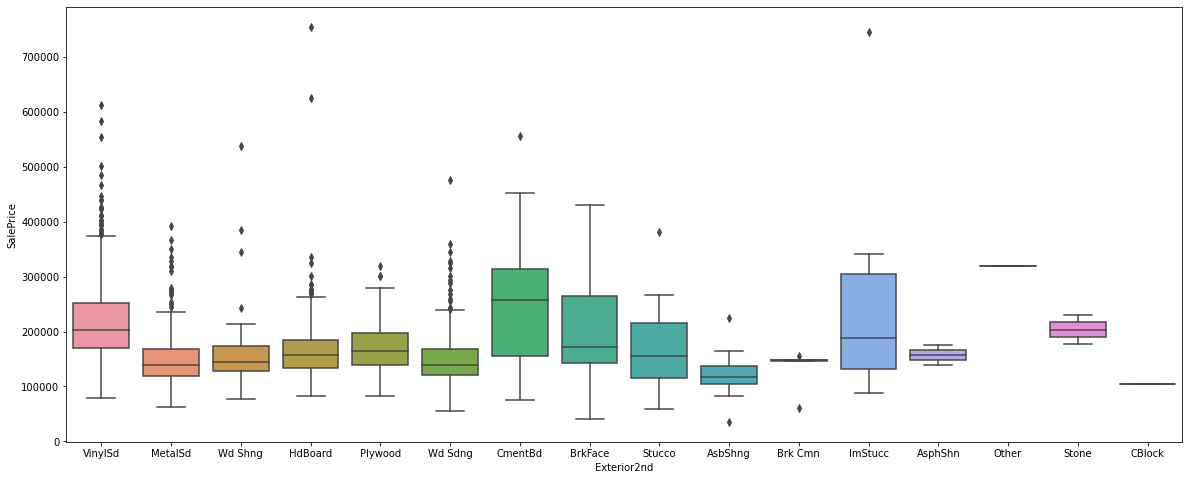

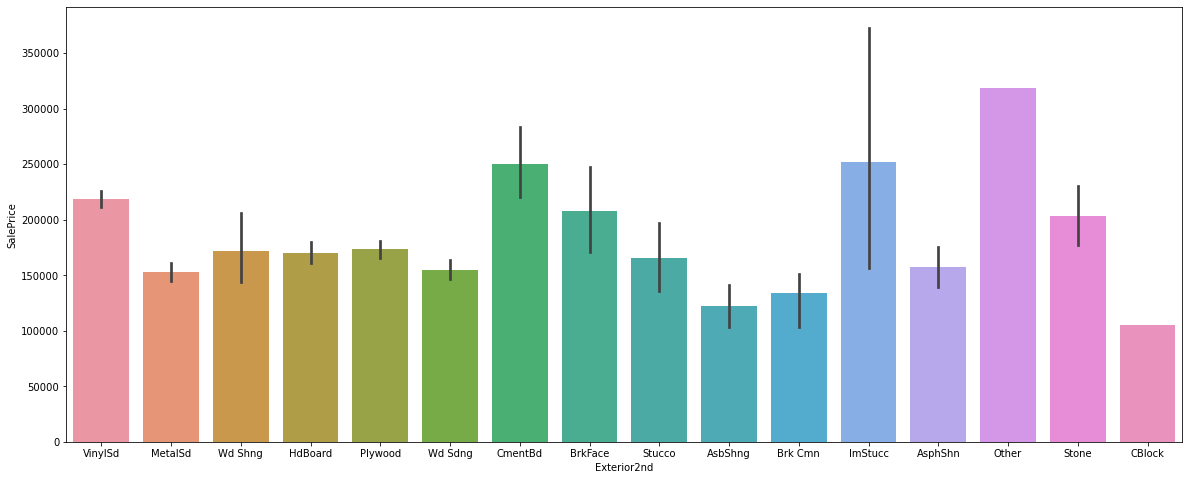

MasVnrType


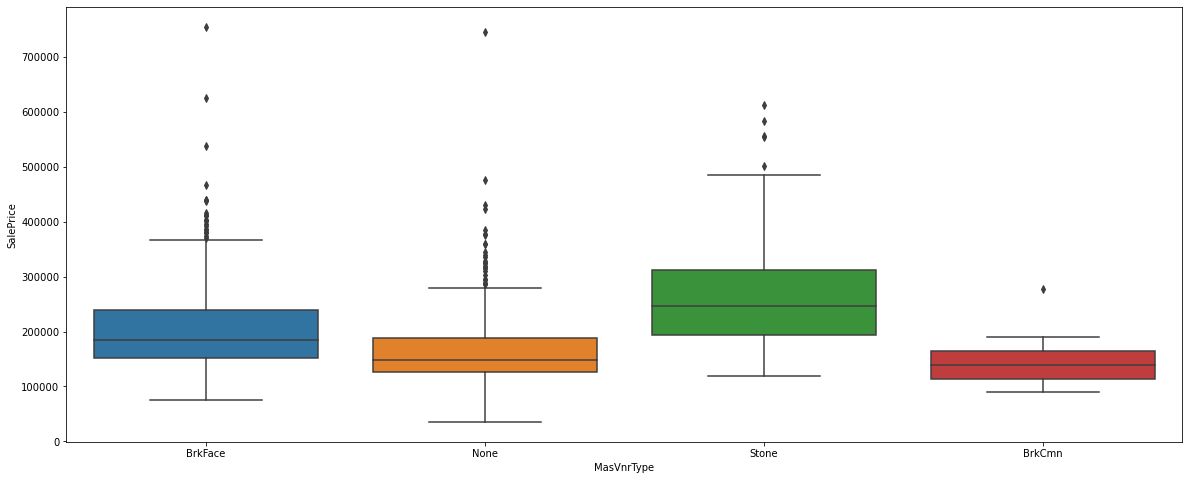

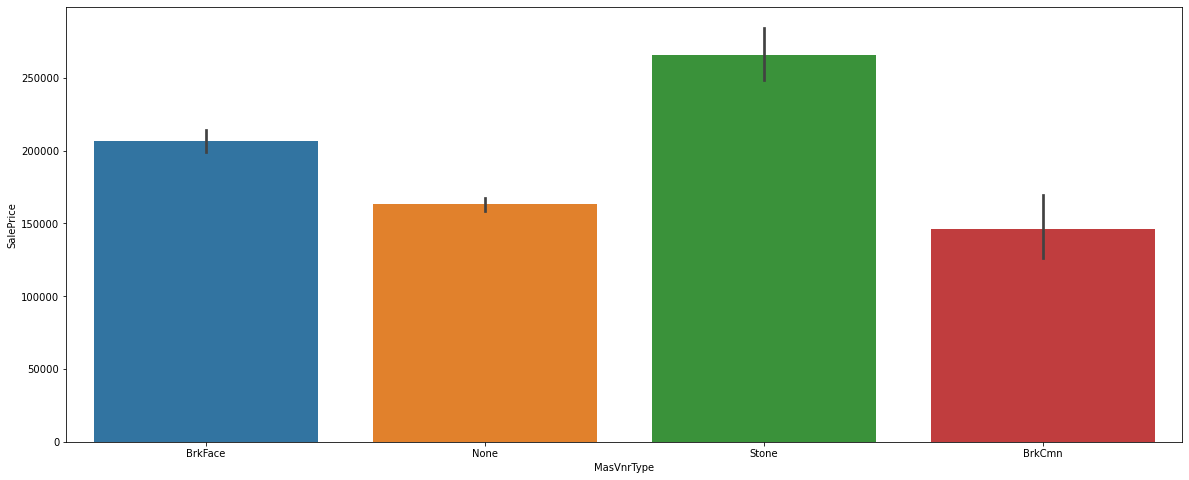

ExterQual


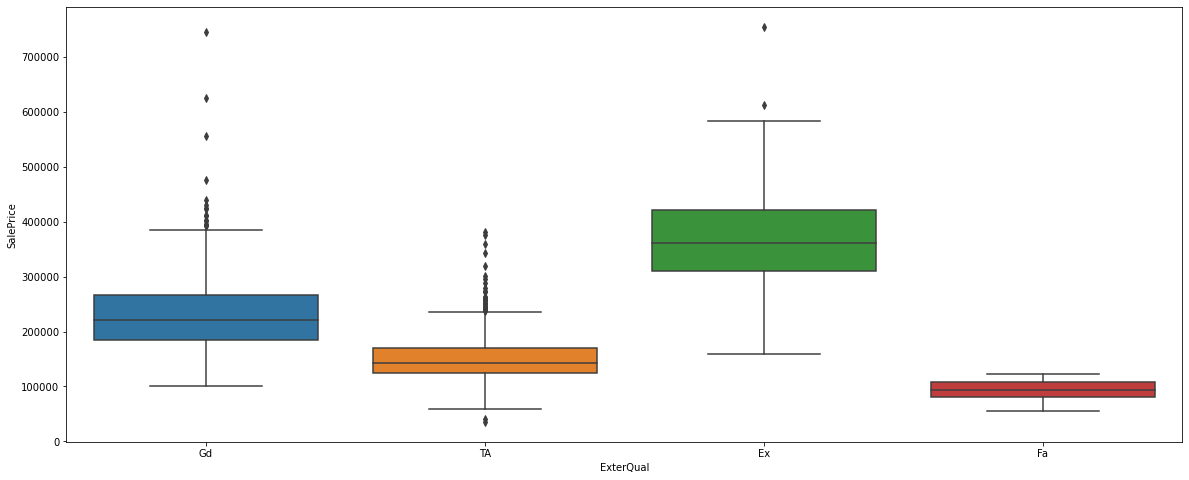

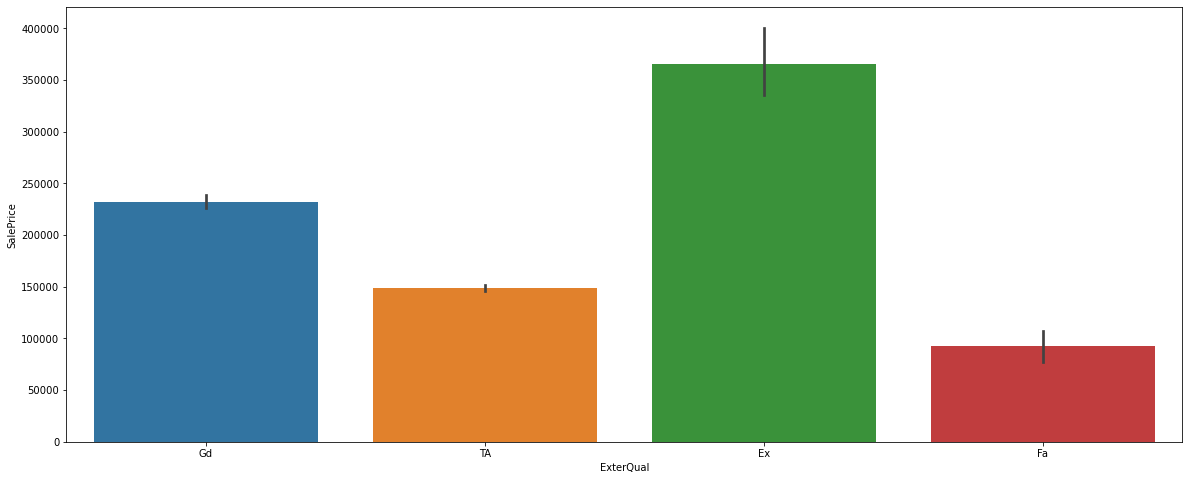

ExterCond


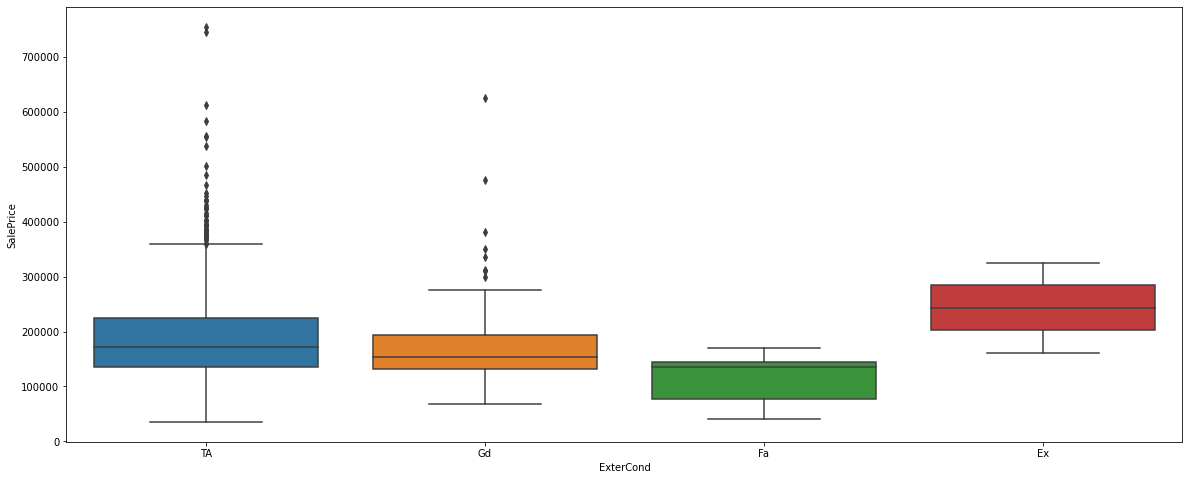

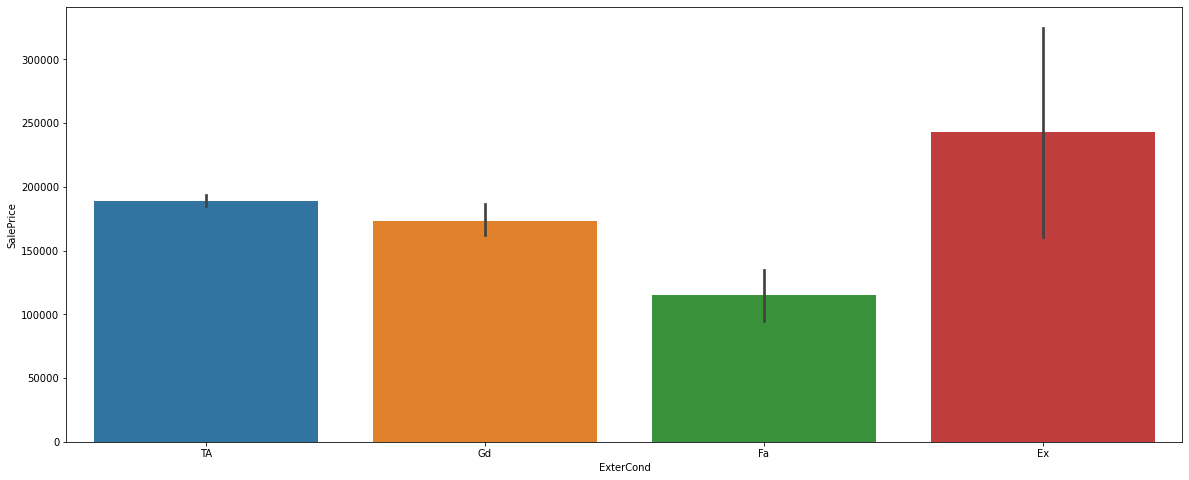

Foundation


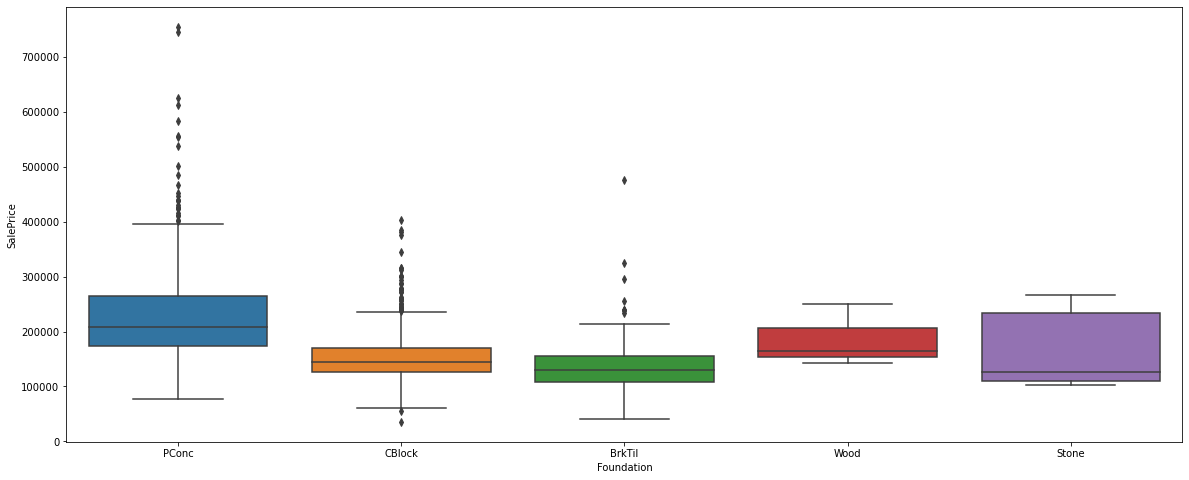

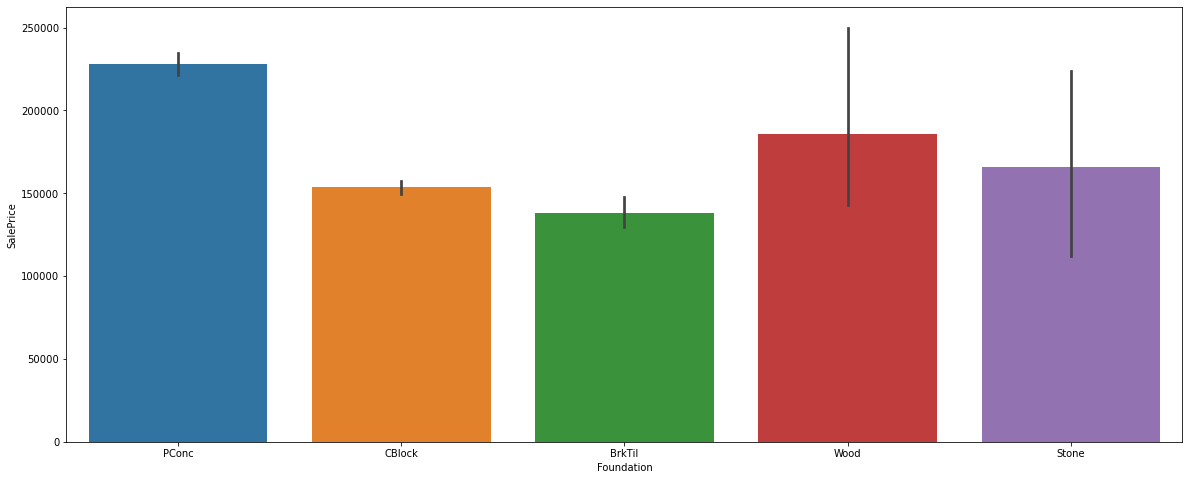

BsmtQual


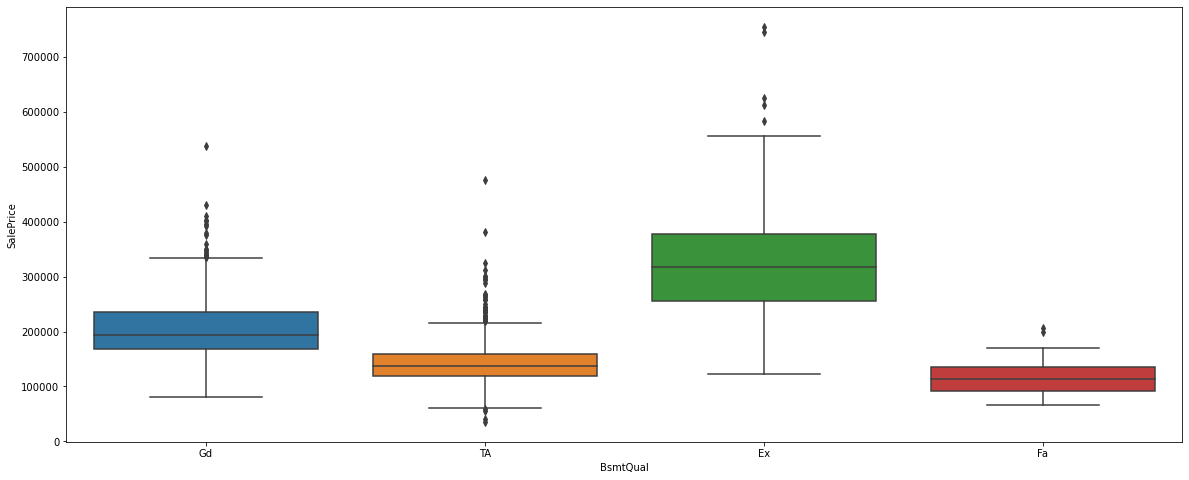

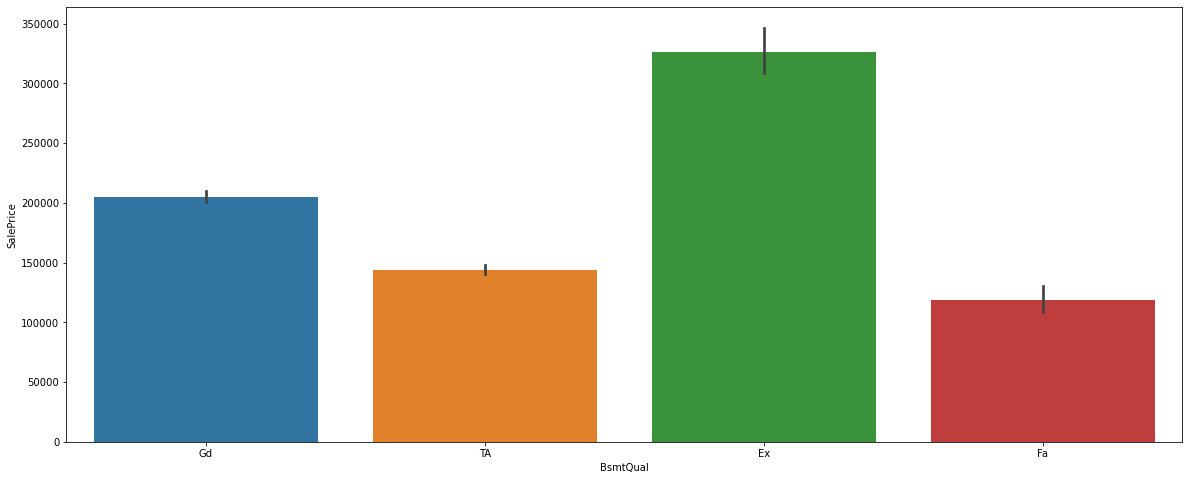

BsmtCond


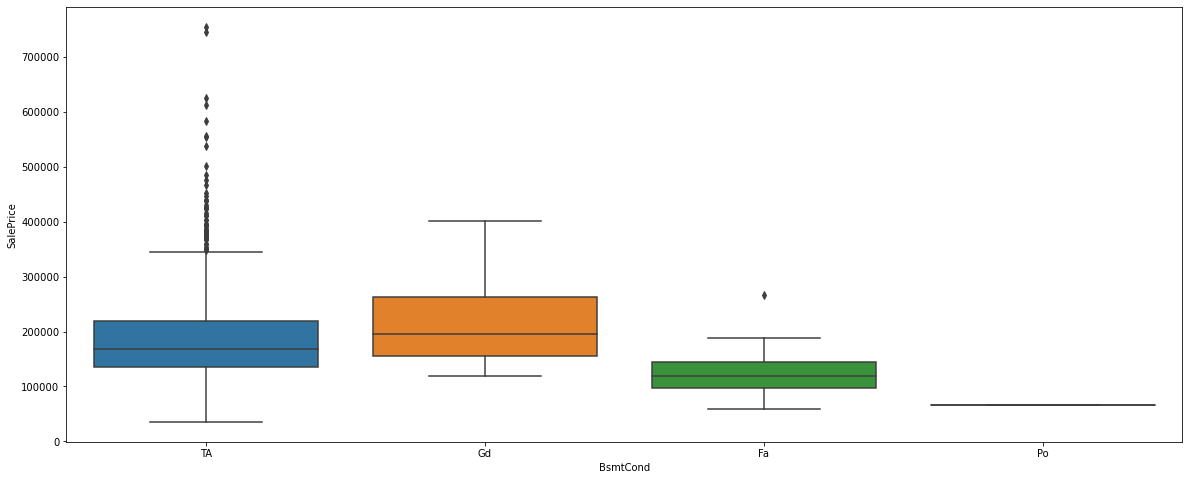

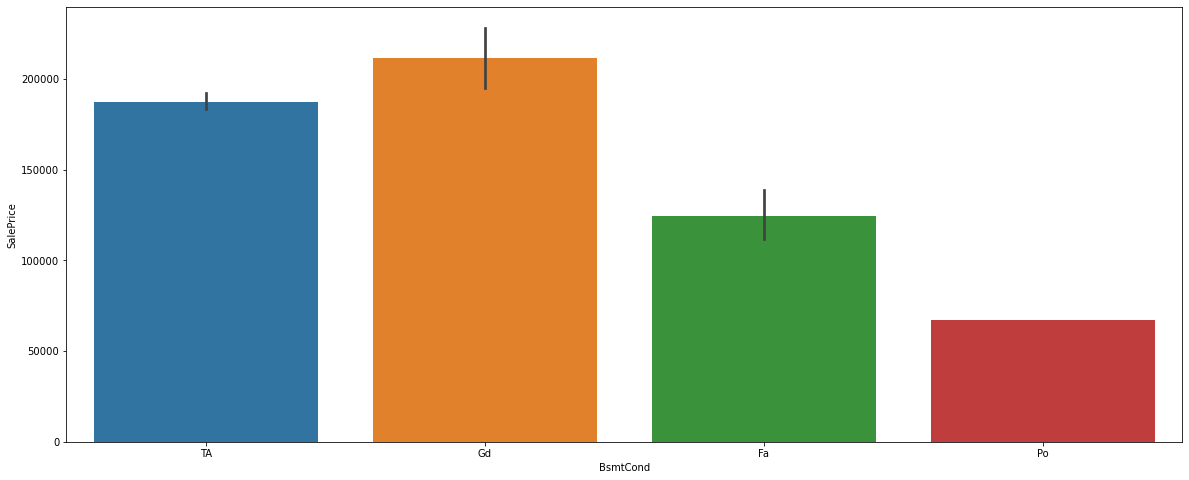

BsmtExposure


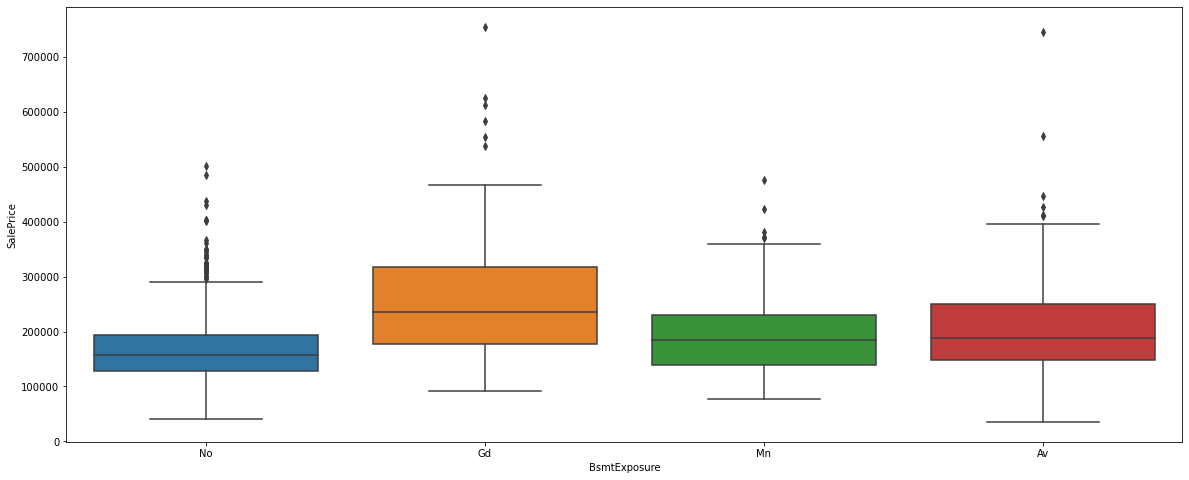

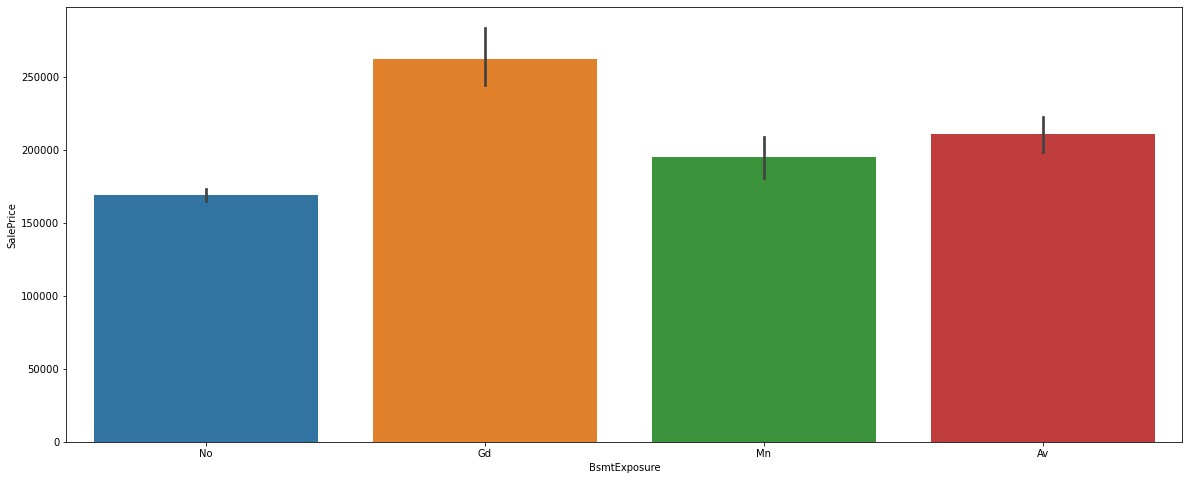

BsmtFinType1


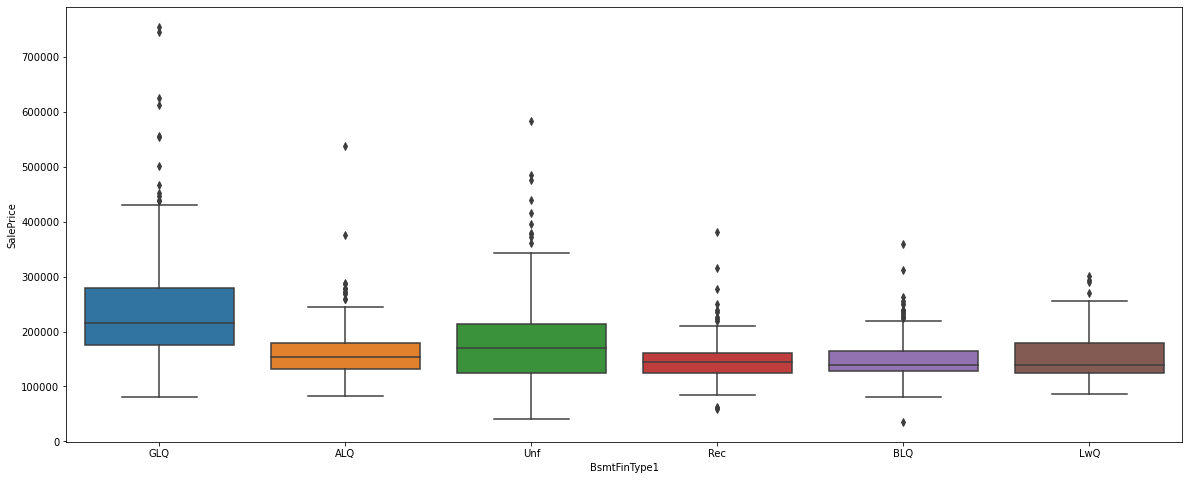

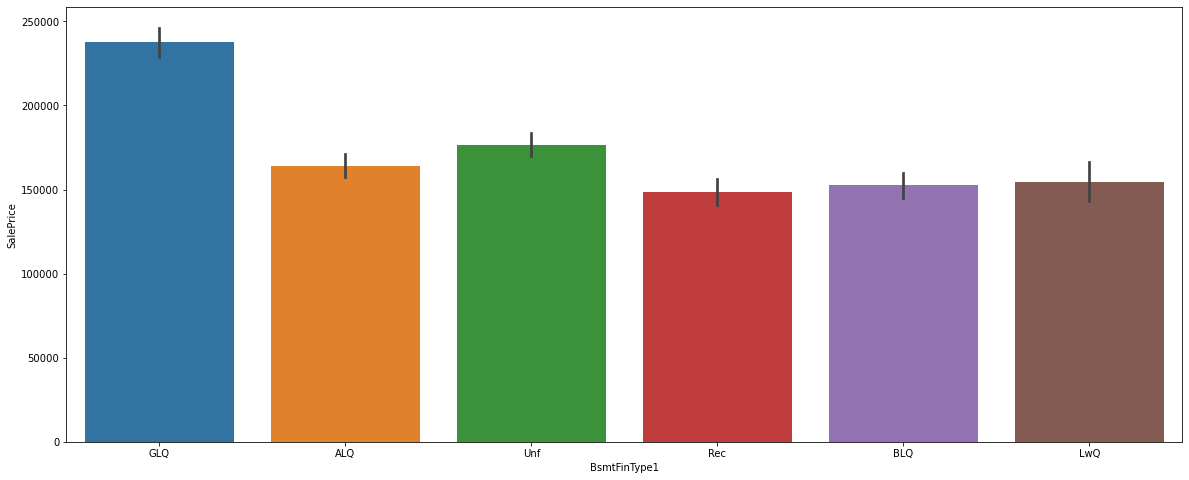

BsmtFinType2


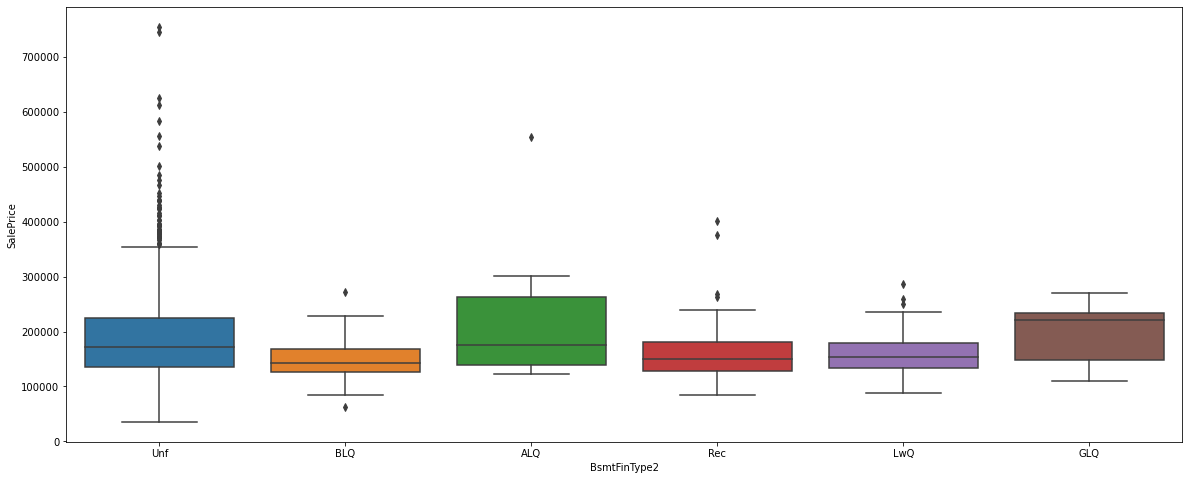

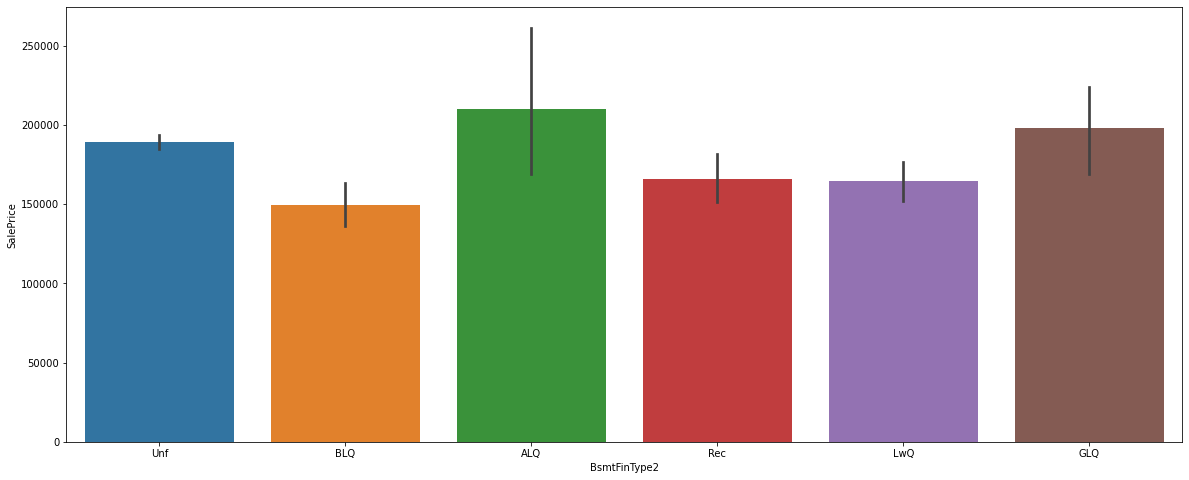

Heating


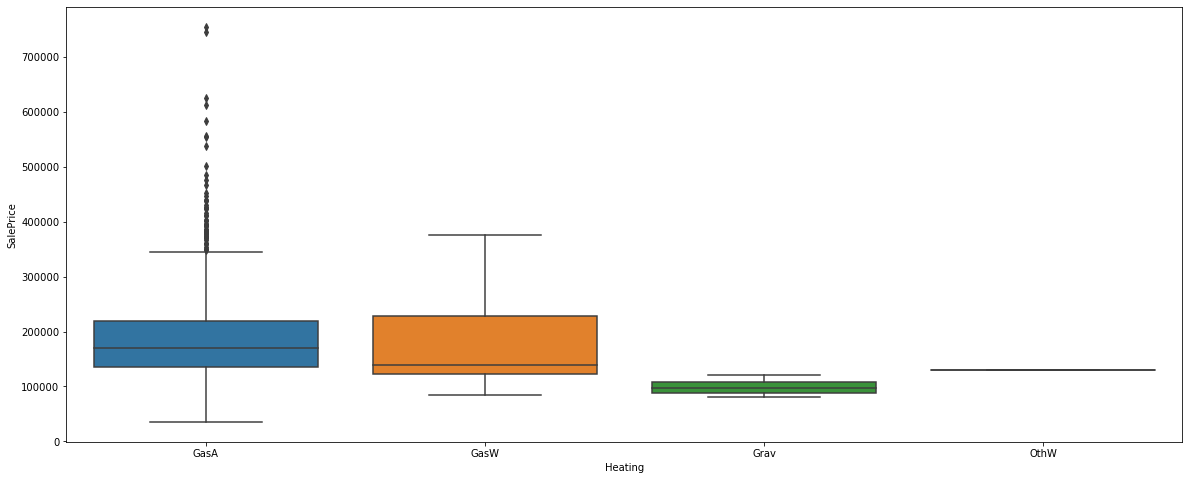

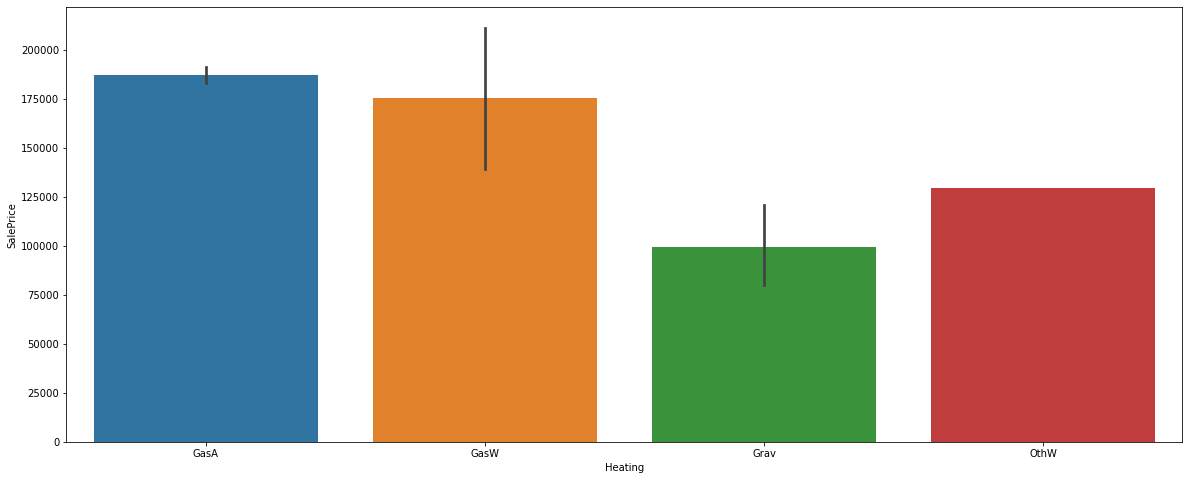

HeatingQC


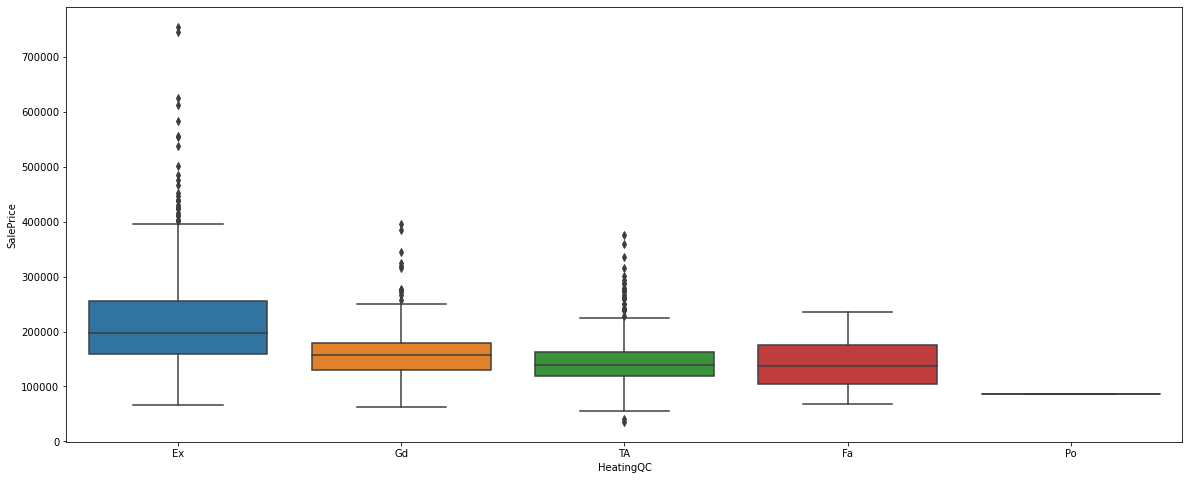

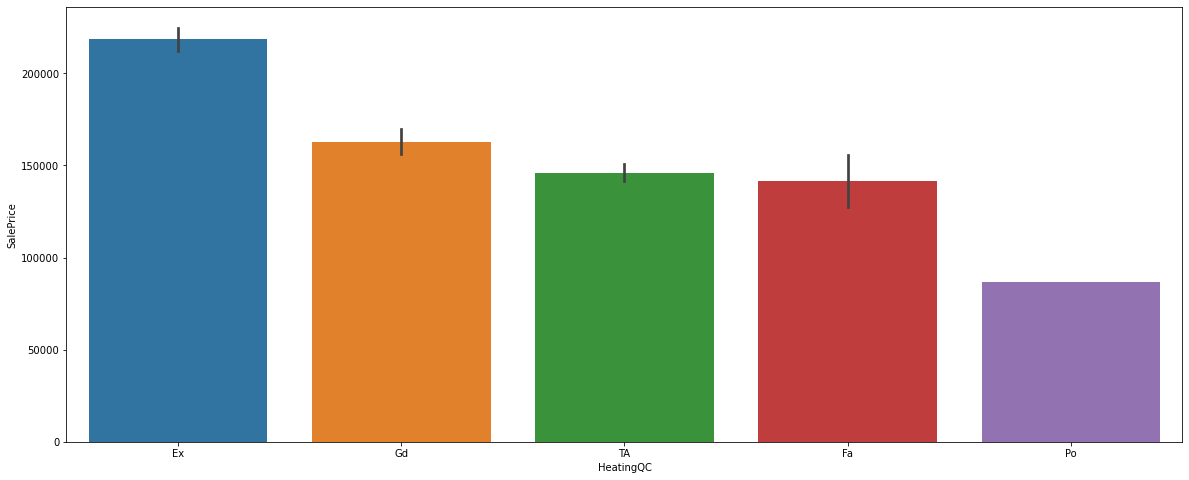

CentralAir


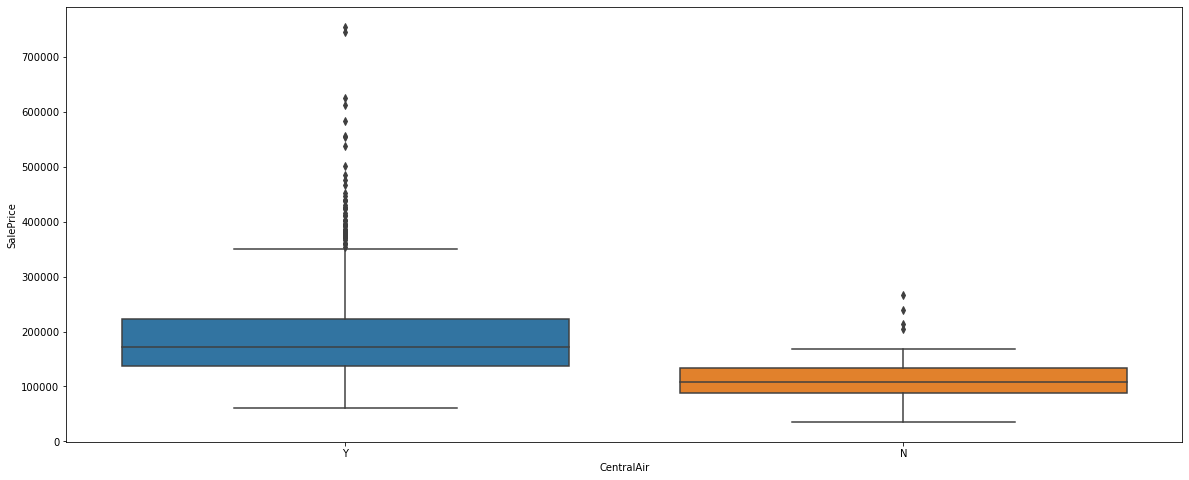

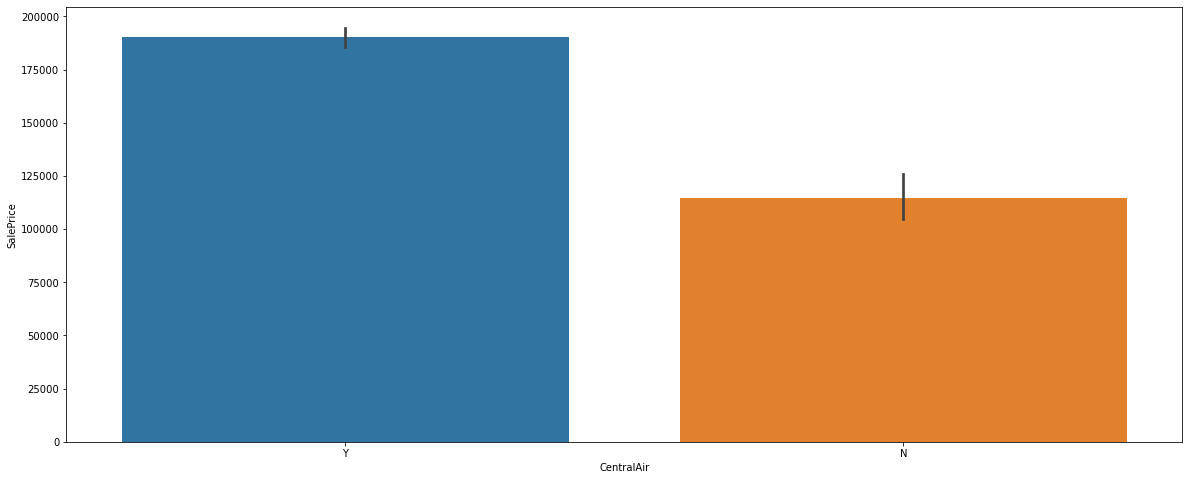

Electrical


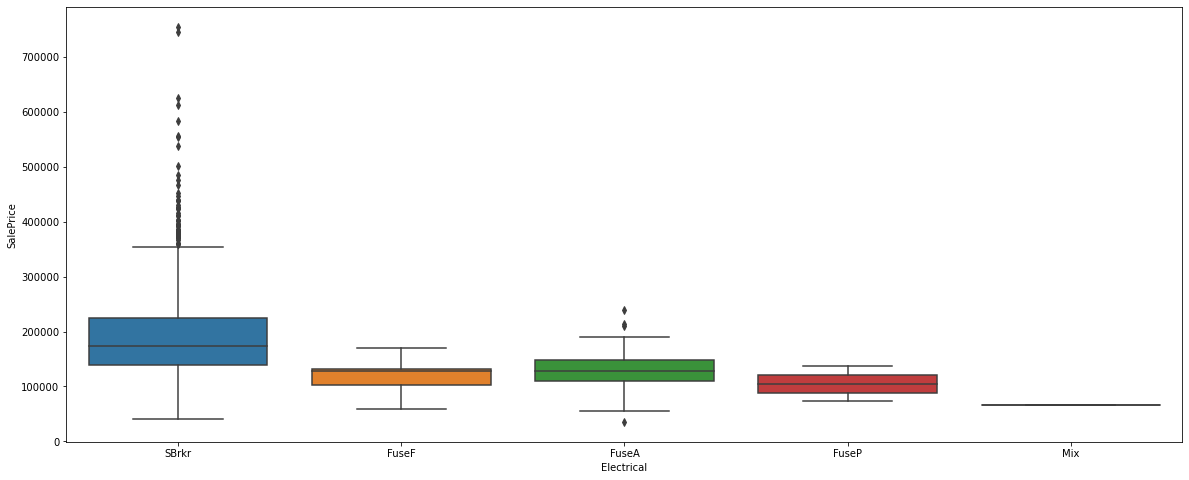

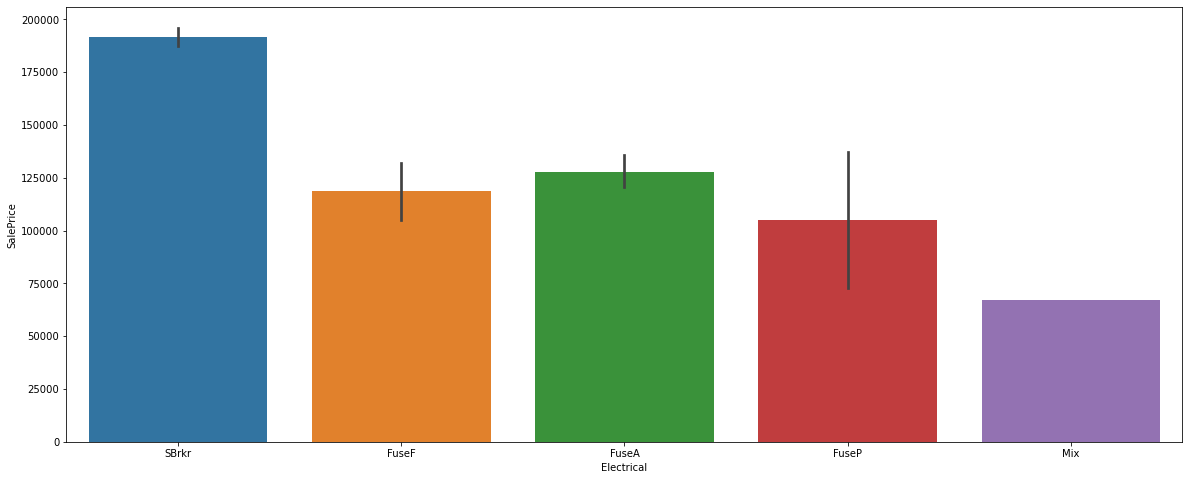

KitchenQual


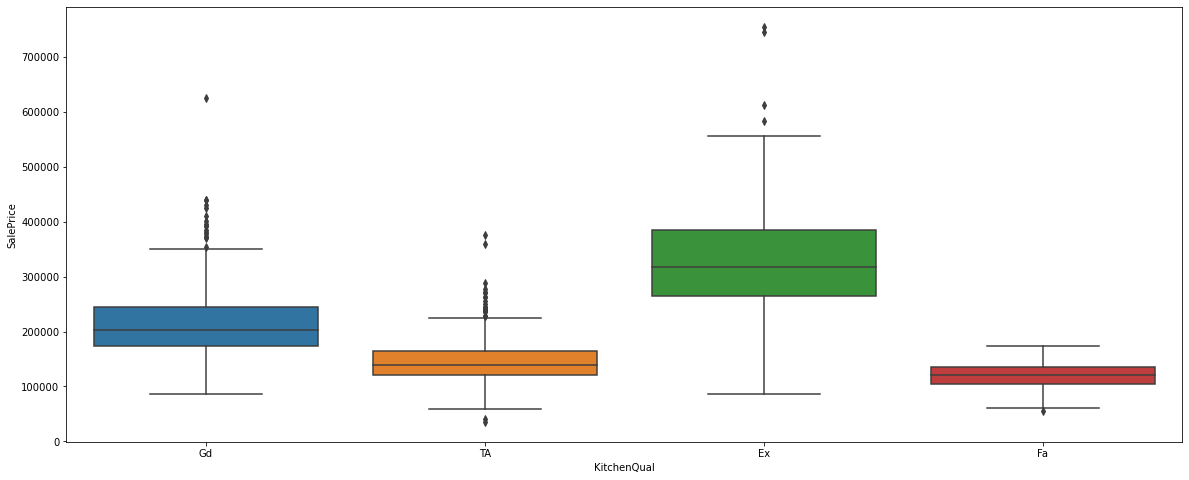

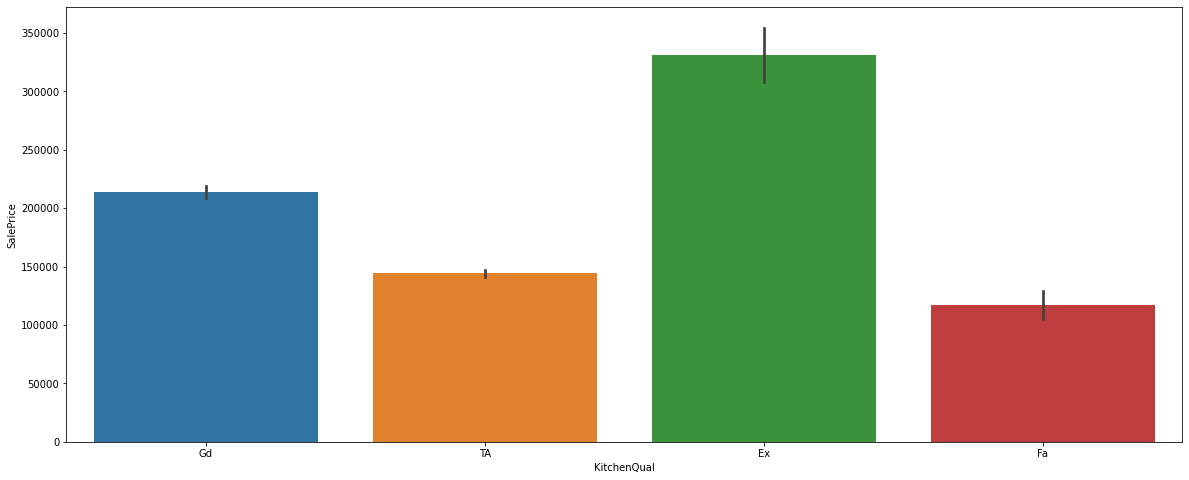

PavedDrive


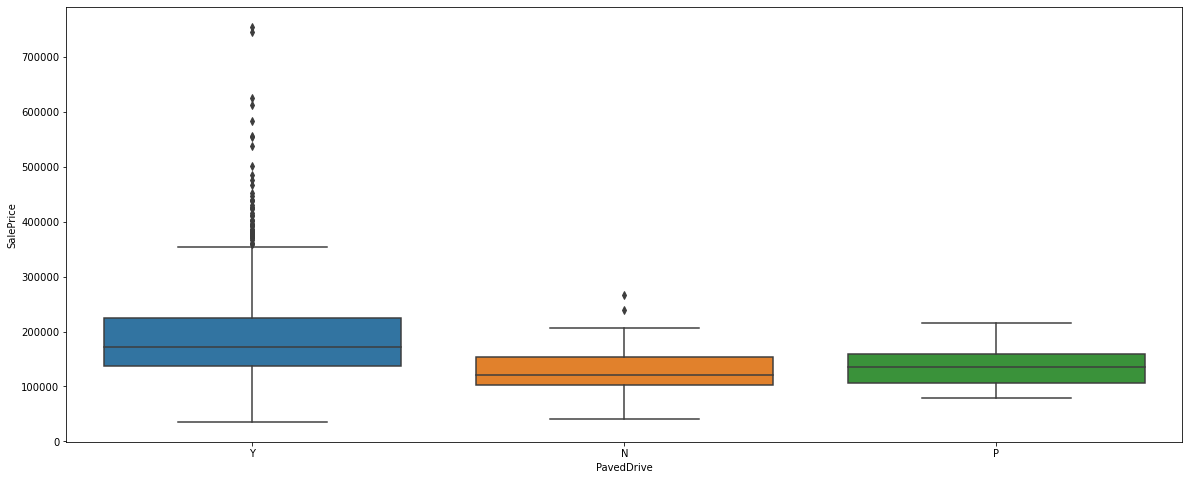

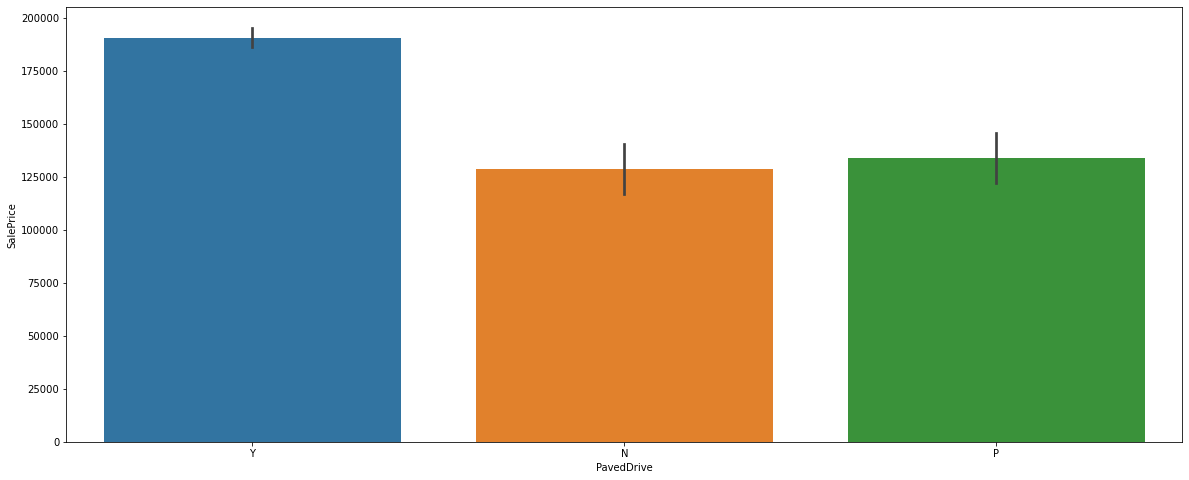

Functional


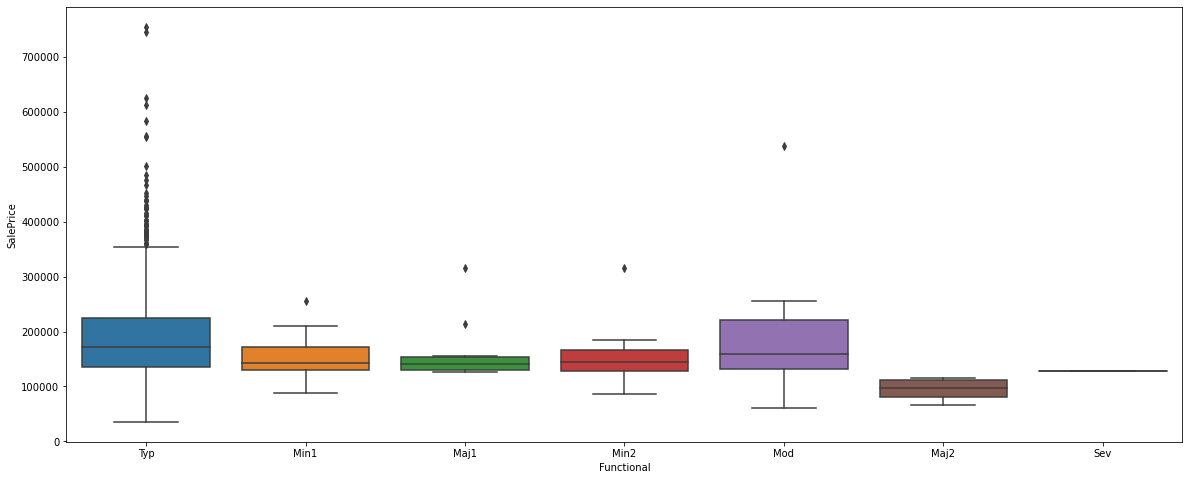

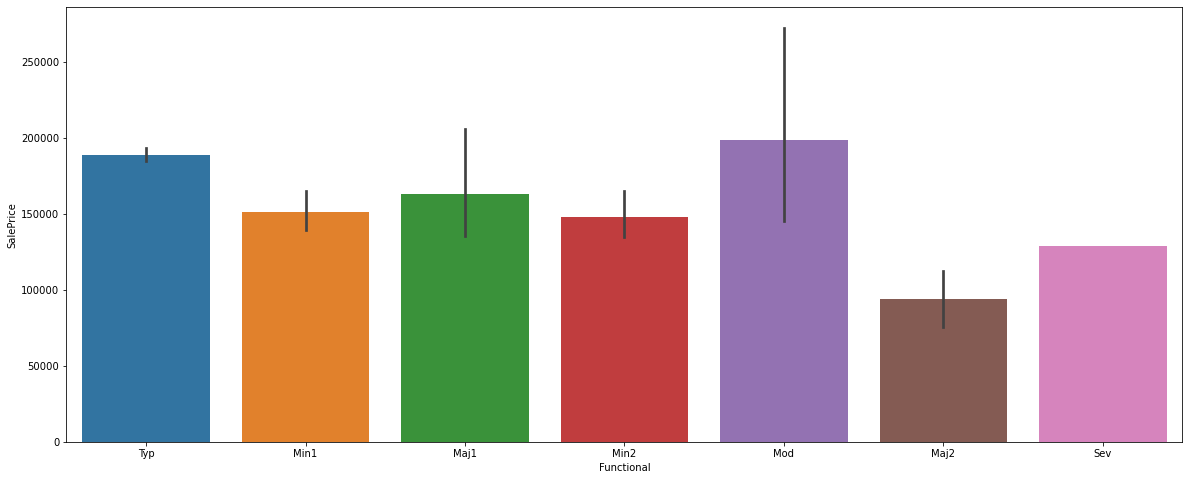

GarageType


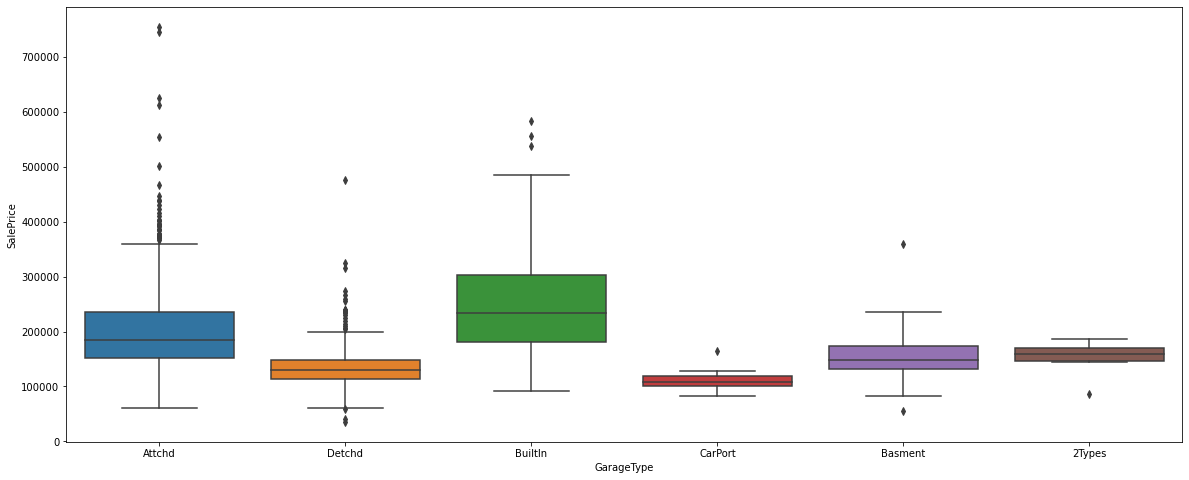

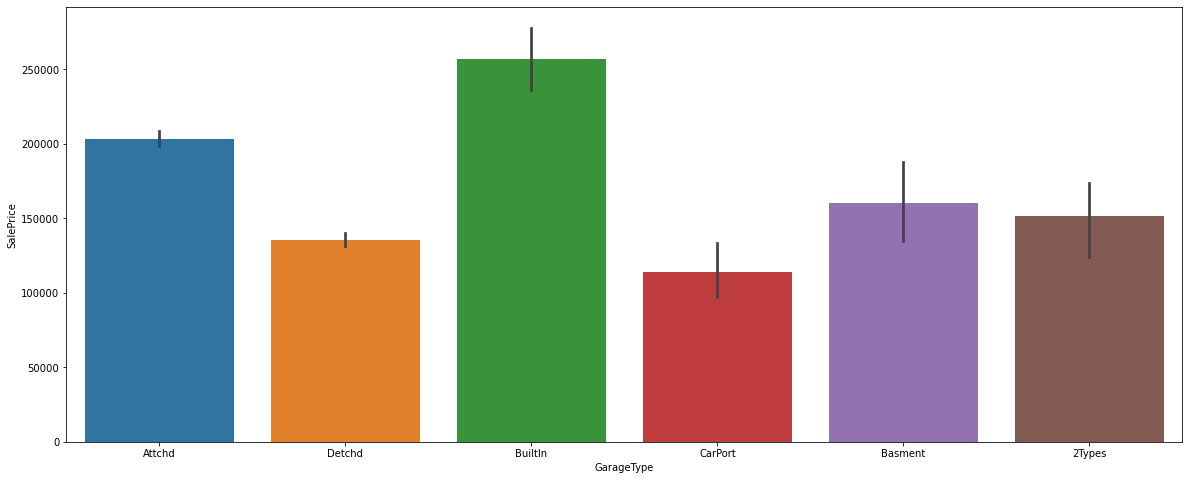

GarageFinish


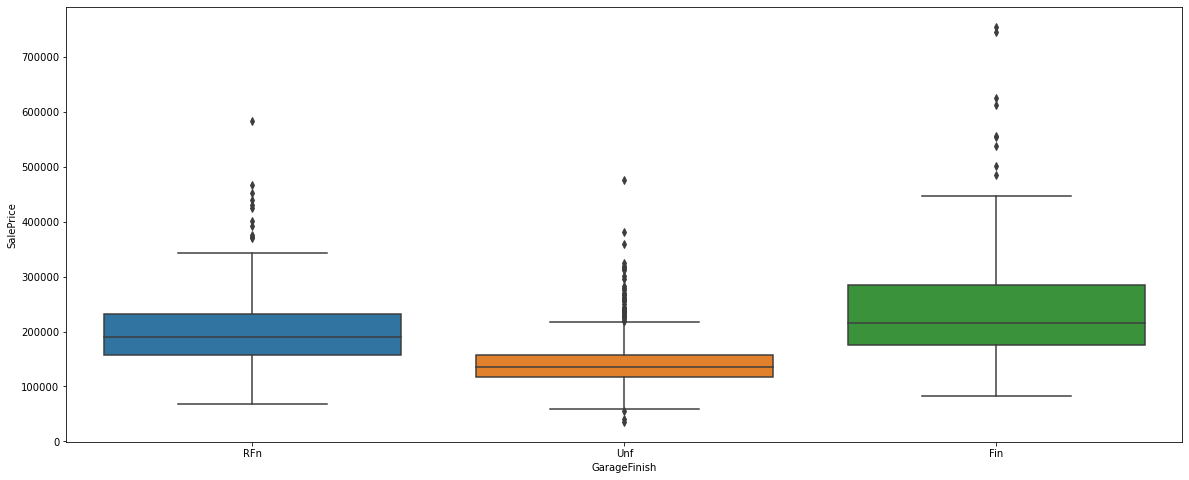

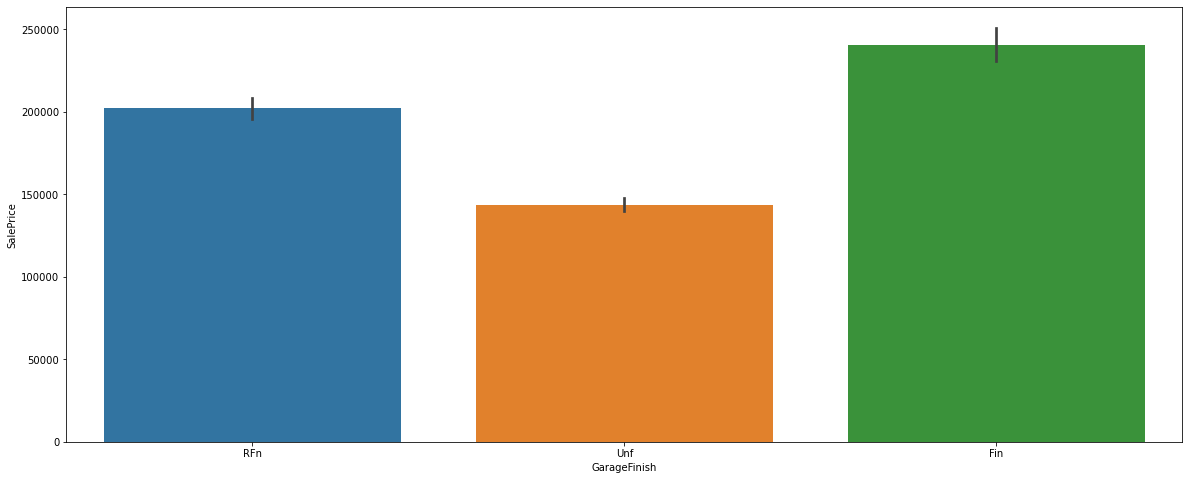

GarageQual


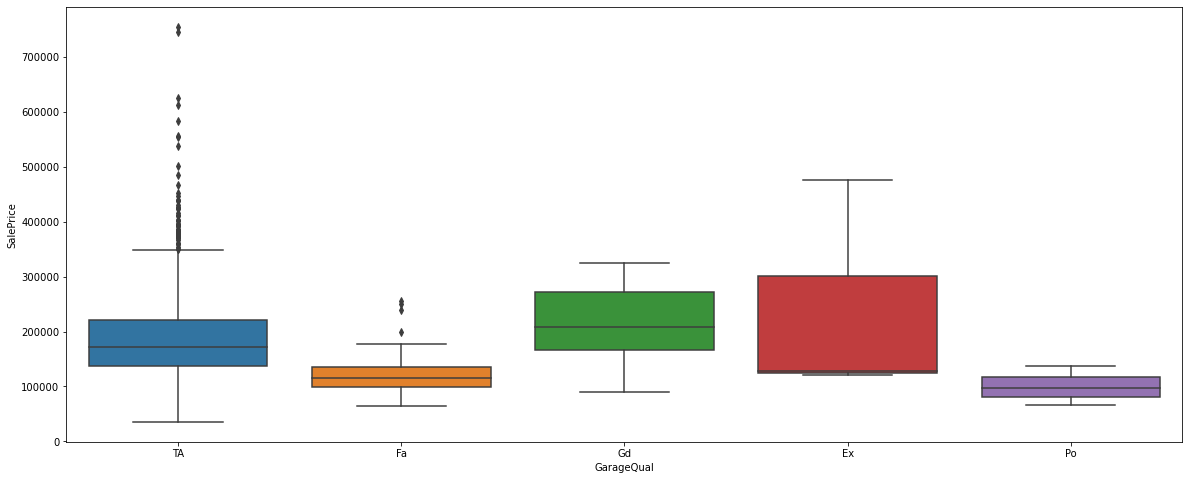

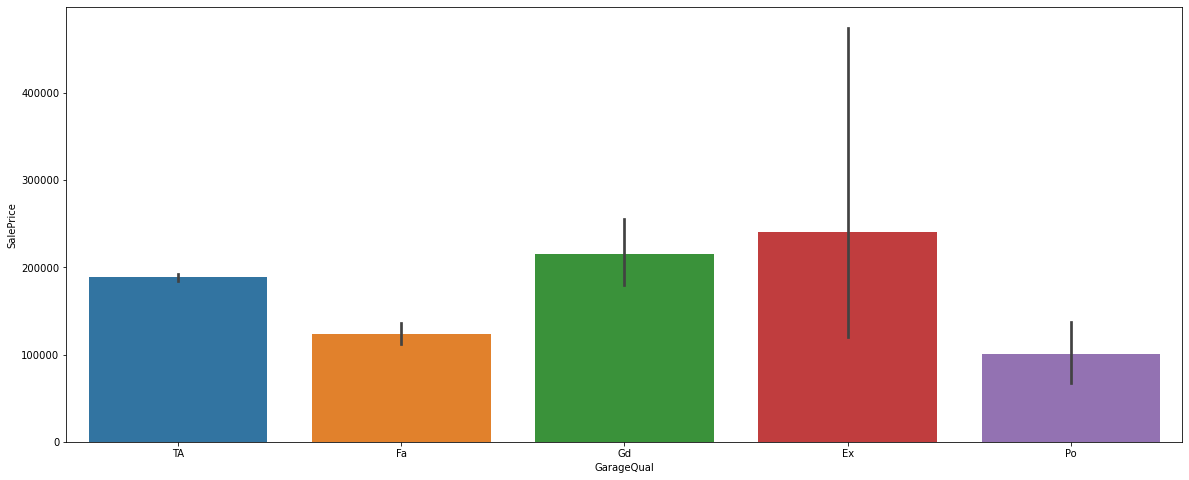

GarageCond


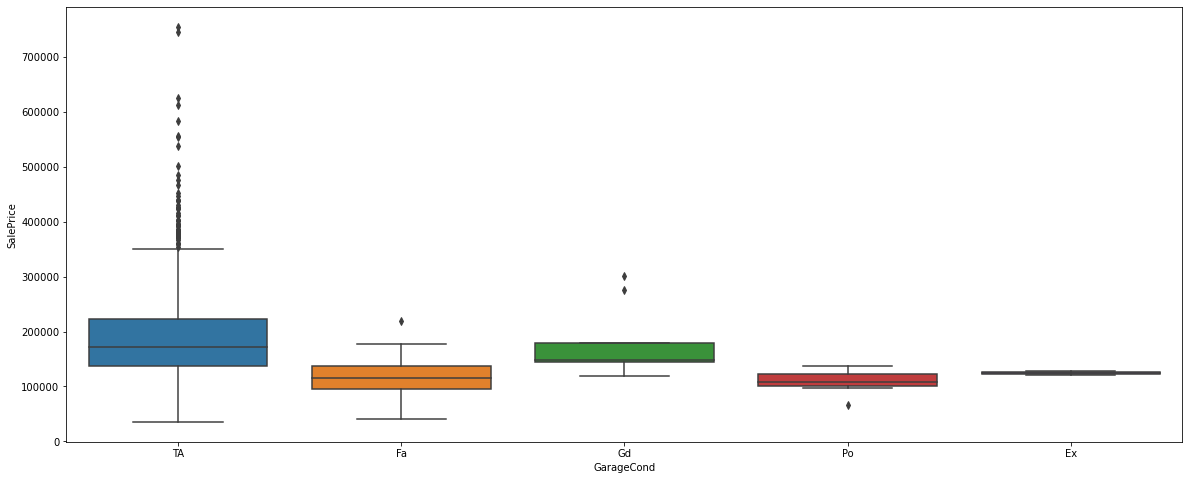

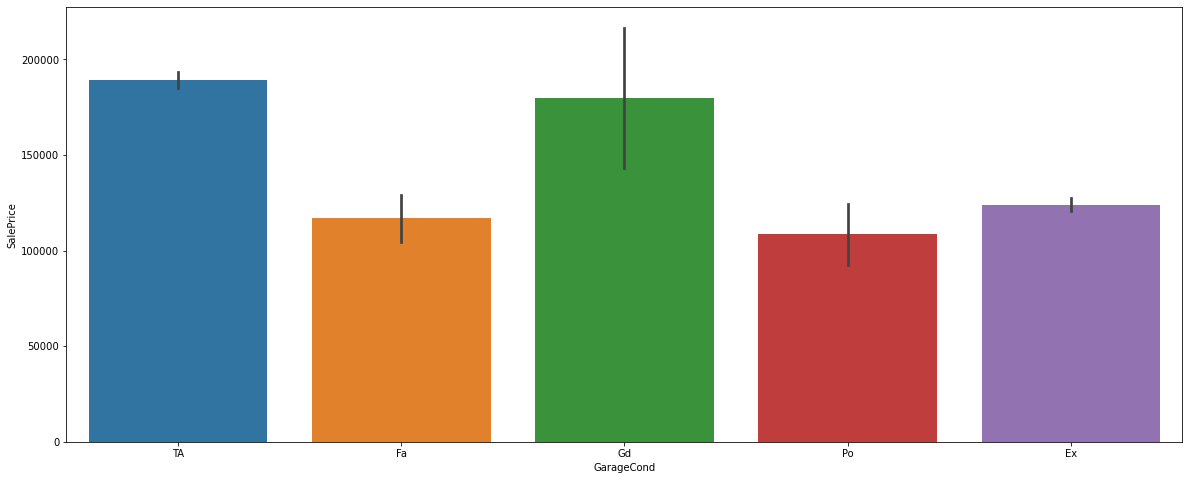

MoSold


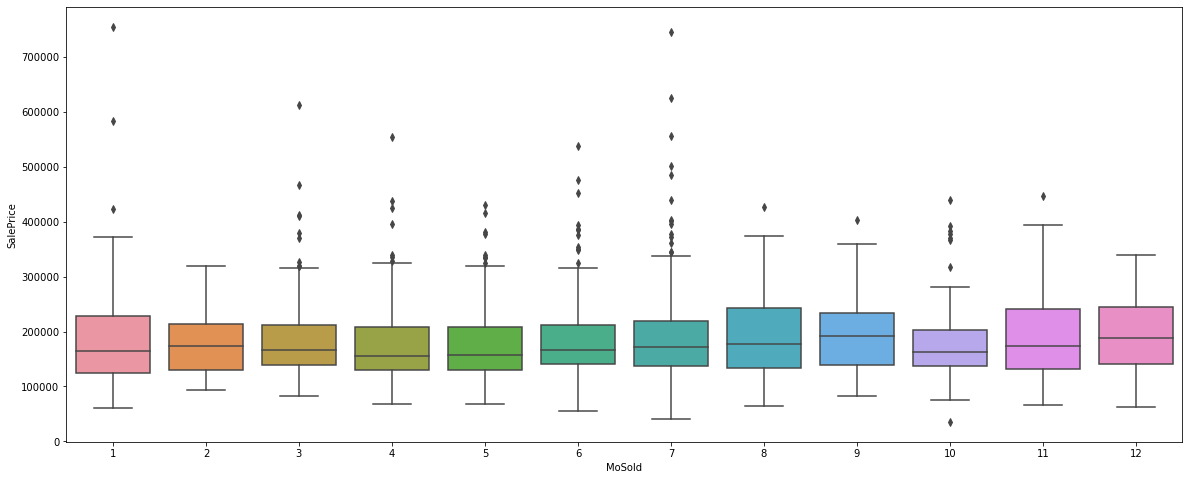

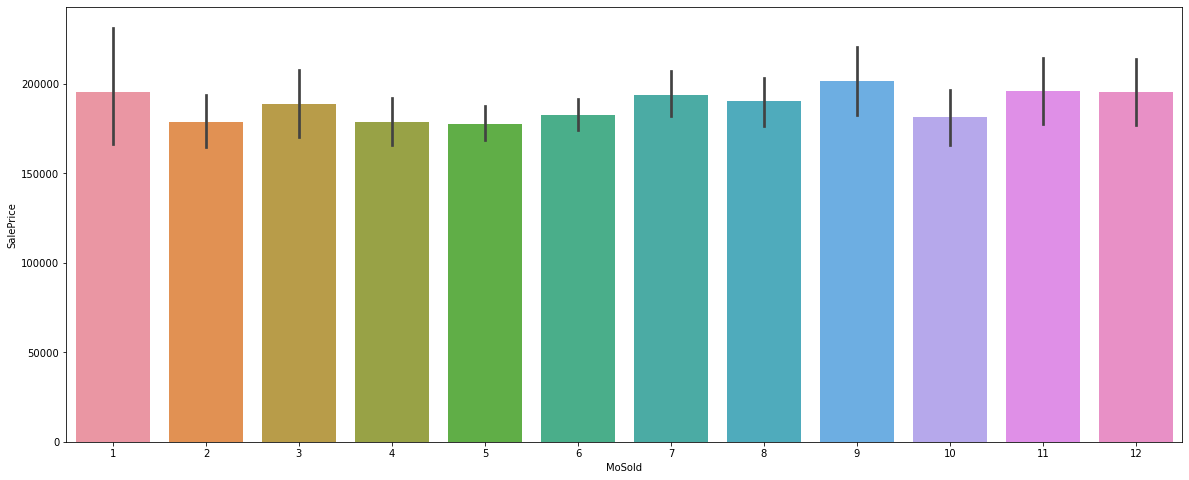

YrSold


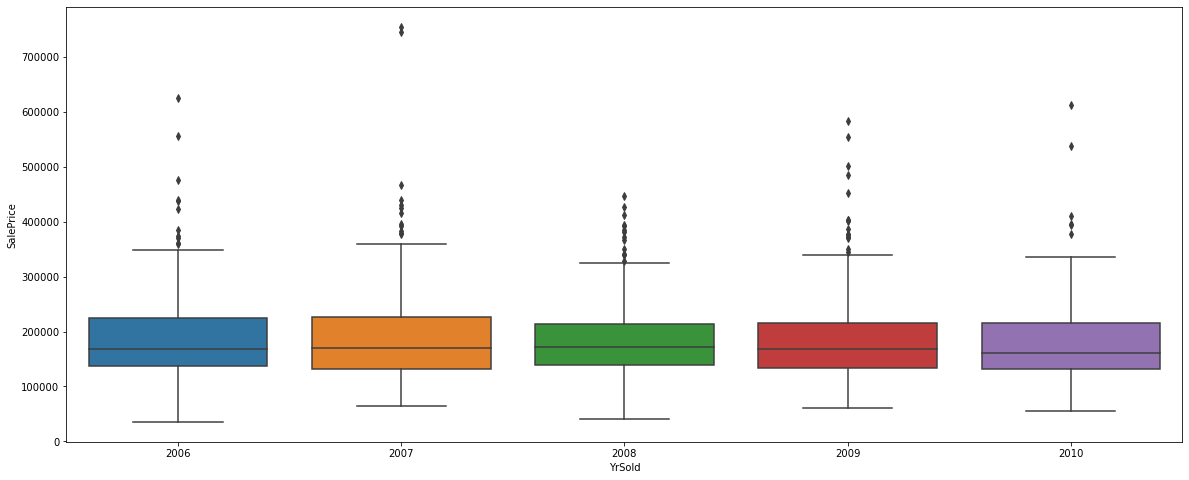

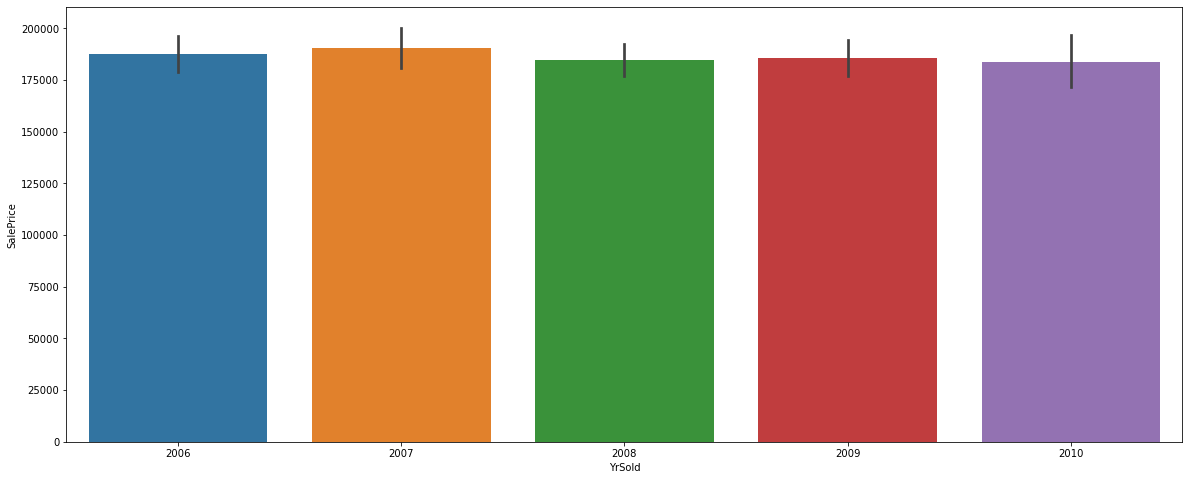

SaleType


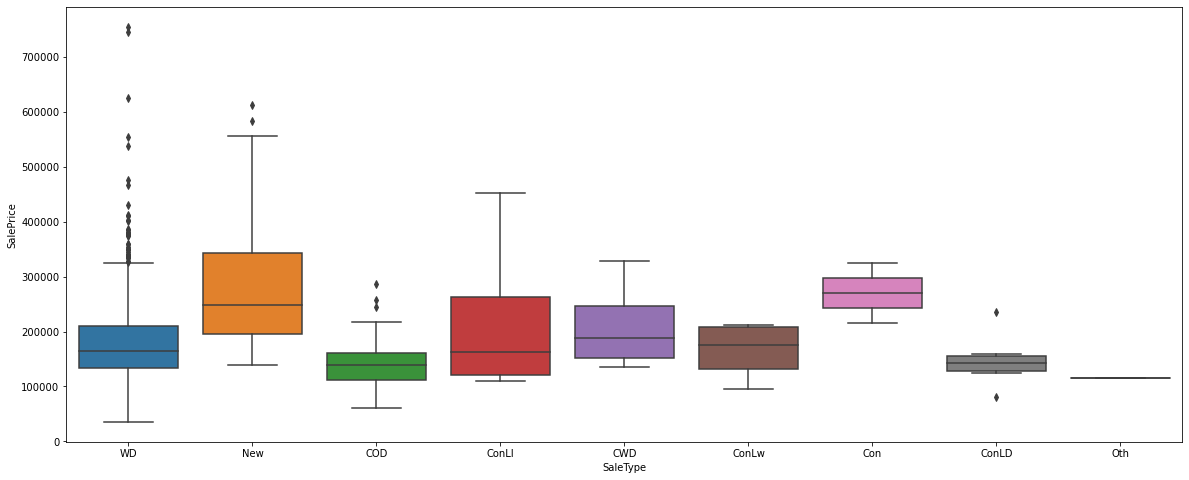

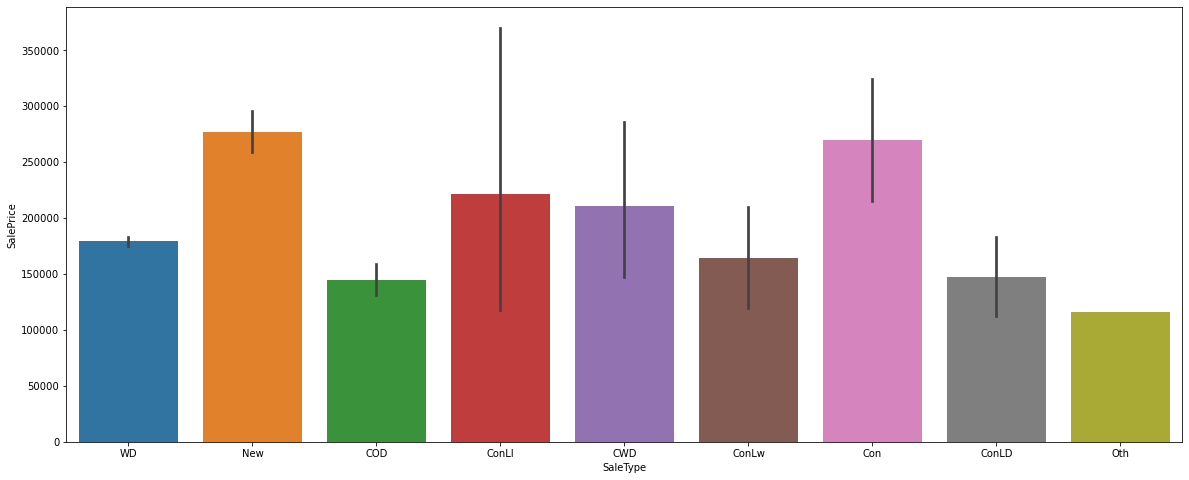

In [22]:
# Plotting boxplot and barplot side-by-side for each categorical variable to understand the pattern

row_count = 1
for col in categorical_cols:
    print(col)
    plt.figure(figsize=(20, 8))
    #plt.subplot(7,1,row_count*2 - 1)
    draw_boxplot(col,'SalePrice', data)
    plt.show()
    #plt.subplot(7,1,row_count*2
    plt.figure(figsize=(20, 8))
    draw_barplot(col,'SalePrice', data)
    row_count=+1
    plt.show()


##### **Conclusion:**
From the above box plots, we can see that there are plenty of outliers for multiple columns.These will have to be treated before proceeding

### Outlier Treatment

In [23]:
# Removing outliers using SciPy

# For each column, it first computes the Z-score of each value in the column,
# relative to the column mean and standard deviation.
# It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
# all(axis=1) ensures that for each row, all column satisfy the constraint.
# Finally, the result of this condition is used to index the dataframe

from scipy import stats
data = data[(np.abs(stats.zscore(data[numeric_cols])) < 3).all(axis=1)]

In [24]:
data.shape

(985, 74)

In [25]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BuiltAge,RemodAge,GarageAge
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,208500,19,19,19.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,223500,21,20,21.0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,250000,22,22,22.0
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,8,2007,WD,Normal,307000,18,17,18.0
10,20,RL,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,2,2008,WD,Normal,129500,57,57,57.0


### Creating Dummy vars from categorical vars

In [26]:
for col in categorical_cols:
    dum = pd.get_dummies(data[col],drop_first = True)
    dum = dum.add_prefix(f'{col}-')
    data = pd.concat([data,dum], axis=1)
    #Remove the original column
    data.drop([col],axis=1, inplace=True)

In [27]:
data.shape

(985, 248)

### Model Building

In [28]:
# Splitting data into test and train sets
data_train,data_test = train_test_split(data, train_size=0.7,test_size = 0.3, random_state=100)
y_train = np.log(data_train.SalePrice)
X_train = data_train.drop("SalePrice",1)

y_test= np.log(data_test.SalePrice)
X_test = data_test.drop("SalePrice",1)

In [29]:
num_val  = X_train.select_dtypes(include=['int64','float64']).columns

In [30]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_val] = scaler.fit_transform(X_train[num_val])
X_test[num_val] = scaler.transform(X_test[num_val])

### **Linear Regression**

In [31]:
ln_reg = LinearRegression()
ln_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
# predict train data to validate
y_train_pred = ln_reg.predict(X_train)
print("Train R2:", r2_score(y_true=y_train, y_pred=y_train_pred))

#predict test data
y_test_pred = ln_reg.predict(X_test)
print("Train R2:", r2_score(y_true=y_test, y_pred=y_test_pred))

Train R2: 0.9633232881566267
Train R2: -2.717902979109933e+21


In [33]:
# Model Parameters
ln_reg_model_params = list(ln_reg.coef_)
ln_reg_model_params.insert(0,ln_reg.intercept_)
#Rounding the params to make them more readable
ln_reg_model_params = [round(x,2) for x in ln_reg_model_params]
#Logic to combine the coeff with the feature name
col_names = (X_train.columns).insert(0,'constant')
ln_reg_model_params_display = list(zip(col_names,ln_reg_model_params))
print(pd.DataFrame(ln_reg_model_params_display))

                  0             1
0          constant  6.833349e+09
1           LotArea  2.000000e-02
2        MasVnrArea  1.000000e-02
3        BsmtFinSF1  5.782657e+10
4        BsmtFinSF2  1.123064e+10
..              ...           ...
243  SaleType-ConLI -1.900000e-01
244  SaleType-ConLw -4.000000e-02
245    SaleType-New -1.600000e-01
246    SaleType-Oth  7.000000e-02
247     SaleType-WD -5.000000e-02

[248 rows x 2 columns]


##### **Conclusion:**
- A simple linear regression model gives a complex model with a negative R2 score.
- This is not a good model as it currently shows traits of overfitting.

### **Ridge Regression**

In [34]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10,50, 100,200,500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 50, 100,
                                   200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
ridge_model_df = pd.DataFrame(ridge_model.cv_results_)
ridge_model_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005255,0.000904,0.002876,0.000118,0.0001,{'alpha': 0.0001},-0.085746,-0.085609,-0.092046,-0.103865,...,-0.091113,0.006790,27,-0.044736,-0.043477,-0.044921,-0.044804,-0.045672,-0.044722,0.000707
1,0.005273,0.000472,0.003075,0.000358,0.001,{'alpha': 0.001},-0.085696,-0.085588,-0.091863,-0.103676,...,-0.090991,0.006739,26,-0.044732,-0.043482,-0.044940,-0.044828,-0.045673,-0.044731,0.000707
2,0.005758,0.000649,0.003158,0.000469,0.01,{'alpha': 0.01},-0.085249,-0.085374,-0.090353,-0.102184,...,-0.089965,0.006382,25,-0.044713,-0.043543,-0.045122,-0.045041,-0.045712,-0.044826,0.000718
3,0.005297,0.000412,0.002980,0.000217,0.05,{'alpha': 0.05},-0.083693,-0.084456,-0.086480,-0.098594,...,-0.087201,0.005825,23,-0.045039,-0.043839,-0.045720,-0.045540,-0.045962,-0.045220,0.000754
4,0.005173,0.000257,0.002868,0.000160,0.1,{'alpha': 0.1},-0.082427,-0.083900,-0.083697,-0.095684,...,-0.085133,0.005460,22,-0.045494,-0.044263,-0.046315,-0.045954,-0.046299,-0.045665,0.000762
5,0.004065,0.000333,0.002191,0.000204,0.2,{'alpha': 0.2},-0.081016,-0.083497,-0.080437,-0.092864,...,-0.082972,0.005357,20,-0.046183,-0.044907,-0.047226,-0.046531,-0.046817,-0.046333,0.000791
6,0.003824,0.000021,0.002093,0.000030,0.3,{'alpha': 0.3},-0.079958,-0.082973,-0.078327,-0.090926,...,-0.081657,0.005148,19,-0.046740,-0.045424,-0.047919,-0.046992,-0.047306,-0.046876,0.000826
7,0.003863,0.000048,0.002133,0.000077,0.4,{'alpha': 0.4},-0.079147,-0.082455,-0.076694,-0.089481,...,-0.080734,0.004935,18,-0.047209,-0.045903,-0.048508,-0.047428,-0.047688,-0.047347,0.000846
8,0.003907,0.000043,0.002167,0.000077,0.5,{'alpha': 0.5},-0.078454,-0.081924,-0.075534,-0.088379,...,-0.080021,0.004770,16,-0.047627,-0.046312,-0.048992,-0.047825,-0.048022,-0.047756,0.000861
9,0.004423,0.000537,0.002360,0.000218,0.6,{'alpha': 0.6},-0.077829,-0.081390,-0.074765,-0.087475,...,-0.079445,0.004611,15,-0.048006,-0.046663,-0.049395,-0.048169,-0.048333,-0.048113,0.000873


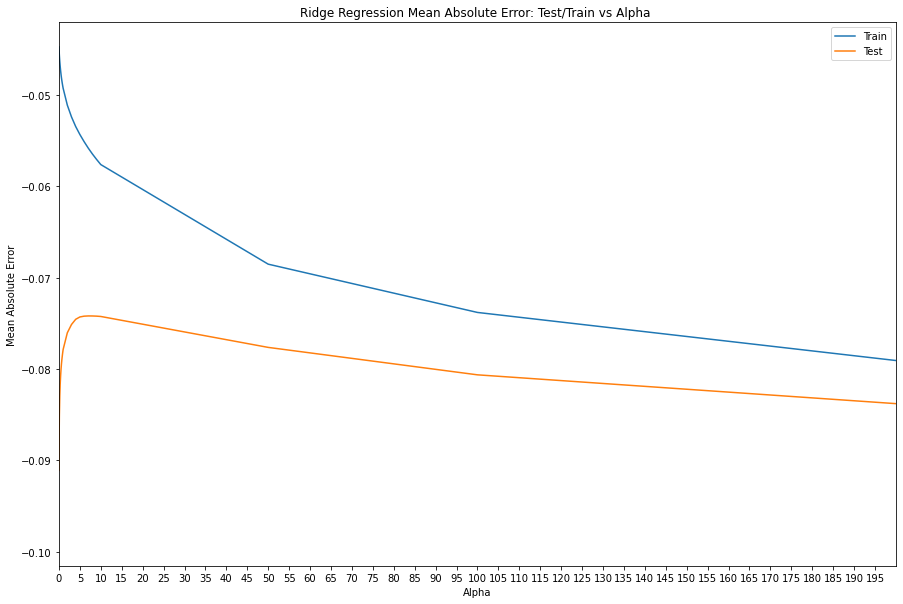

In [36]:
# Plotting the test/train scores v/s Alpha
plt.figure(figsize=(15,10))
plt.plot(ridge_model_df['param_alpha'],ridge_model_df['mean_train_score'])
plt.plot(ridge_model_df['param_alpha'],ridge_model_df['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Ridge Regression Mean Absolute Error: Test/Train vs Alpha ')
plt.xlim(0,200)
plt.xticks(np.arange(0,200,5))
plt.legend(['Train', 'Test'])
plt.show()

In [37]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print("Ridge - Train R2:", r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print("Ridge - Test R2:", r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge - Train R2: 0.9456306308011466
Ridge - Test R2: 0.9055415054026152


In [38]:
# Ridge Model Parameters
ridge_model_params = list(ridge.coef_)
ridge_model_params.insert(0,ridge.intercept_)
#Rounding the params to make them more readable
ridge_model_params = [round(x,4) for x in ridge_model_params]
#Logic to combine the coeff with the feature name
col_names = (X_train.columns).insert(0,'constant')
ridge_model_params_display = list(zip(col_names,ridge_model_params))
print(pd.DataFrame(ridge_model_params_display))

                  0        1
0          constant  11.7187
1           LotArea   0.0187
2        MasVnrArea   0.0042
3        BsmtFinSF1   0.0345
4        BsmtFinSF2   0.0055
..              ...      ...
243  SaleType-ConLI  -0.0146
244  SaleType-ConLw  -0.0060
245    SaleType-New   0.0210
246    SaleType-Oth   0.0071
247     SaleType-WD  -0.0411

[248 rows x 2 columns]


##### **Conclusion:**
- Ridge Regression provides a model with coeff which are very close to zero.
- This is a much better model than one with simple linear regression as it gives a much better R2 square with Test data
- This model is extremely complex as Ridge regression uses all the features.

### **Lasso Regression**

In [39]:
lasso = Lasso()
# cross validation
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 50, 100,
                                   200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
lasso_model_results = pd.DataFrame(lasso_model.cv_results_)
lasso_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051699,0.002344,0.002805,0.000260,0.0001,{'alpha': 0.0001},-0.075226,-0.077528,-0.075938,-0.086716,...,-0.077895,0.004551,2,-0.048359,-0.047418,-0.049076,-0.048762,-0.048784,-0.048480,0.000578
1,0.011197,0.000478,0.002614,0.000094,0.001,{'alpha': 0.001},-0.075709,-0.072653,-0.064958,-0.079843,...,-0.073923,0.005032,1,-0.061889,-0.060158,-0.062896,-0.061465,-0.060903,-0.061462,0.000922
2,0.005314,0.000794,0.002640,0.000532,0.01,{'alpha': 0.01},-0.091904,-0.094013,-0.081780,-0.094606,...,-0.091785,0.005224,3,-0.088551,-0.087923,-0.091101,-0.088522,-0.088466,-0.088912,0.001118
3,0.004257,0.000205,0.002286,0.000196,0.05,{'alpha': 0.05},-0.117442,-0.109895,-0.088704,-0.116862,...,-0.109404,0.010688,4,-0.106104,-0.105529,-0.109816,-0.108084,-0.107210,-0.107349,0.001517
4,0.003939,0.000120,0.002200,0.000082,0.1,{'alpha': 0.1},-0.151029,-0.140533,-0.111470,-0.159945,...,-0.141674,0.016424,5,-0.137587,-0.138507,-0.141978,-0.141416,-0.139682,-0.139834,0.001669


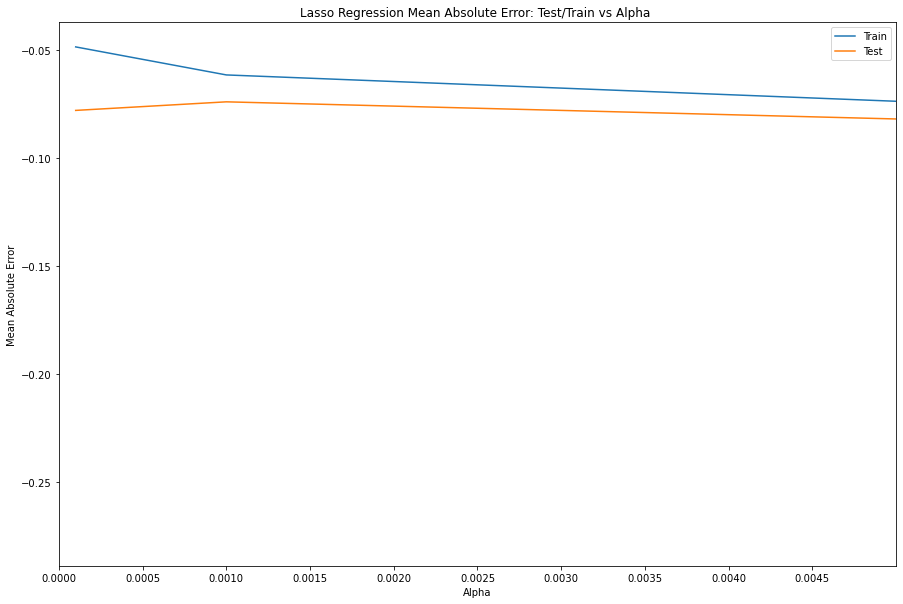

In [41]:
# Plotting the test/train scores v/s Alpha
plt.figure(figsize=(15,10))
plt.plot(lasso_model_results['param_alpha'],lasso_model_results['mean_train_score'])
plt.plot(lasso_model_results['param_alpha'],lasso_model_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Lasso Regression Mean Absolute Error: Test/Train vs Alpha ')
plt.xlim(0,0.005)
plt.xticks(np.arange(0,0.005,0.0005))
plt.legend(['Train', 'Test'])
plt.show()

In [42]:
alpha = 0.0005
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
print("Lasso - Train R2:", r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print("Lasso - Test R2:", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

Lasso - Train R2: 0.9456974773633567
Lasso - Test R2: 0.9074103838792


In [43]:
# Ridge Model Parameters
lasso_model_params = list(lasso.coef_)
lasso_model_params.insert(0,lasso.intercept_)
#Rounding the params to make them more readable
lasso_model_params = [round(x,4) for x in lasso_model_params]
#Logic to combine the coeff with the feature name
col_names = (X_train.columns).insert(0,'constant')
lasso_model_params_display = sorted(list(zip(col_names,lasso_model_params)), key=lambda x:abs(x[1]), reverse = True)
# Printing the top 105 features as they have a non-zero coeff
print(pd.DataFrame(lasso_model_params_display)[1:106])

                        0       1
1           OverallCond-3 -0.1983
2    Neighborhood-Crawfor  0.1626
3    SaleCondition-Alloca -0.1368
4            CentralAir-Y  0.1204
5               GrLivArea  0.1123
..                    ...     ...
101          LowQualFinSF -0.0006
102   Neighborhood-NWAmes -0.0006
103    Neighborhood-NAmes  0.0005
104           YrSold-2009  0.0002
105    MasVnrType-BrkFace -0.0001

[105 rows x 2 columns]


##### **Conclusion:**
- Lasso regression results in a much better model than simple linear regression and Ridge regression
- The model is much simpler as lasso helps with feature selection and reduces the coeff of unwanted features to 0

## Conclusion

|   |  Simple Linear Regression |  Ridge |  Lasso |
|:-:|:-:|:-:|---|
| Train R2 | 0.963  | 0.945  | 0.945  |
| Test R2 | -2.71e+21  |  0.905 |  0.907 |
| Features  | 247  | 247  |105   |

From the above table we can clearly see that Lasso regression model is the simplest(less variables) and has a comparable R2 score with Ridge regression model. Hence, It will be our model of choice.

**The most optimum value of lambda for Lasso Regression is 0.0005**

The top 50 features to consider are:
    

In [44]:
print(pd.DataFrame(lasso_model_params_display)[1:51])

                        0       1
1           OverallCond-3 -0.1983
2    Neighborhood-Crawfor  0.1626
3    SaleCondition-Alloca -0.1368
4            CentralAir-Y  0.1204
5               GrLivArea  0.1123
6           OverallQual-9  0.1041
7    Neighborhood-MeadowV -0.0977
8          Functional-Typ  0.0876
9    Neighborhood-Somerst  0.0794
10   SaleCondition-Normal  0.0759
11   Neighborhood-StoneBr  0.0716
12   Neighborhood-BrkSide  0.0678
13  SaleCondition-Partial  0.0676
14          OverallQual-8  0.0652
15               BuiltAge -0.0606
16          OverallQual-4 -0.0568
17         MSSubClass-160 -0.0553
18            TotalBsmtSF  0.0504
19            SaleType-WD -0.0493
20        BsmtExposure-Gd  0.0490
21            BsmtCond-TA  0.0486
22    Exterior1st-BrkFace  0.0452
23        Condition1-Norm  0.0432
24          OverallCond-5 -0.0427
25          OverallCond-4 -0.0385
26   Neighborhood-NridgHt  0.0373
27         KitchenQual-Gd -0.0367
28            MSZoning-RL  0.0343
29         Kit

From the above List, the 15 most relavant original columns are:
- OverallCond
- Neighborhood
- SaleCondition
- CentralAir
- GrLivArea
- OverallQual
- Functional
- BuiltAge
- MSSubClass
- TotalBsmtSF
- SaleType
- BsmtExposure
- BsmtCond
- Exterior1st
- Condition1